In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.plotting import scatter_matrix

# Machine Learning Algorithms
import sklearn
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


# Performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

#decision tree
import sklearn.tree as sktree

# For Missing Values
from sklearn.impute import SimpleImputer

import statsmodels.api as sm
import patsy


C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
import seaborn as sns #visualisation
import scipy
from scipy import stats
from scipy.stats.mstats import winsorize

# Get the data

In [3]:
players_22 = pd.read_csv('./FIFA/players_22.csv', index_col='sofifa_id')

C:\Users\Kiko\AppData\Local\Temp/ipykernel_12192/1465523920.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players_22 = pd.read_csv('./FIFA/players_22.csv', index_col='sofifa_id')


In [4]:
players_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19239 entries, 158023 to 264540
Columns: 109 entries, player_url to nation_flag_url
dtypes: float64(16), int64(43), object(50)
memory usage: 16.1+ MB


# Structure of the file

In [5]:
players_22.sort_values(by='value_eur', ascending=False).head(20)

,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
sofifa_id,,,,,,,,,,,,,,,,,,,,,
231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,194000000.0,230000.0,22,1998-12-20,...,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png
239085,https://sofifa.com/player/239085/erling-haalan...,E. Haaland,Erling Braut Haaland,ST,88,93,137500000.0,110000.0,20,2000-07-21,...,60+3,60+3,60+3,60+3,19+3,https://cdn.sofifa.net/players/239/085/22_120.png,https://cdn.sofifa.net/teams/22/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1352/60.png,https://cdn.sofifa.net/flags/no.png
202126,https://sofifa.com/player/202126/harry-kane/22...,H. Kane,Harry Kane,ST,90,90,129500000.0,240000.0,27,1993-07-28,...,61+3,61+3,61+3,64+3,20+3,https://cdn.sofifa.net/players/202/126/22_120.png,https://cdn.sofifa.net/teams/18/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
228702,https://sofifa.com/player/228702/frenkie-de-jo...,F. de Jong,Frenkie de Jong,"CM, CDM, CB",87,92,119500000.0,210000.0,24,1997-05-12,...,78+3,78+3,78+3,82+3,18+3,https://cdn.sofifa.net/players/228/702/22_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/nl.png
230621,https://sofifa.com/player/230621/gianluigi-don...,G. Donnarumma,Gianluigi Donnarumma,GK,89,93,119500000.0,110000.0,22,1999-02-25,...,31+3,31+3,31+3,31+3,87+3,https://cdn.sofifa.net/players/230/621/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1343/60.png,https://cdn.sofifa.net/flags/it.png
233049,https://sofifa.com/player/233049/jadon-sancho/...,J. Sancho,Jadon Sancho,"RM, CF, LM",87,91,116500000.0,150000.0,21,2000-03-25,...,48+3,48+3,48+3,60+3,19+3,https://cdn.sofifa.net/players/233/049/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png


In [6]:
players_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19239 entries, 158023 to 264540
Columns: 109 entries, player_url to nation_flag_url
dtypes: float64(16), int64(43), object(50)
memory usage: 16.1+ MB


In [7]:
players_22.shape

(19239, 109)

# Data Cleaning

In [8]:
players_22.columns

Index(['player_url', 'short_name', 'long_name', 'player_positions', 'overall',
       'potential', 'value_eur', 'wage_eur', 'age', 'dob',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=109)

In [9]:
players_22.head()

,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [10]:
#Keep only the target column and the columns which are not calculated using our target , or they can be calculated using the target and Item since we only have one item now
players_22 = players_22.drop(columns = ['player_url','long_name','club_loaned_from','club_contract_valid_until','club_joined','nation_team_id','nation_position','club_position','work_rate','body_type','real_face','player_tags','player_traits','player_face_url','club_logo_url','club_flag_url','nation_logo_url','nation_flag_url',
                                       'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk',
                                        'player_positions', 'dob', 'weak_foot', 'club_team_id',
                                        'club_name', 
                                        'league_name','league_level', 'club_jersey_number', 'nationality_id', 'nationality_name', 'nation_jersey_number',
                                        'wage_eur','height_cm','weight_kg','release_clause_eur',
                                        'pace','shooting','passing','dribbling','defending',
                                        'physic','attacking_short_passing','skill_curve',
                                        'mentality_interceptions','defending_standing_tackle',
                                        'goalkeeping_reflexes','goalkeeping_speed'])
                                        #'skill_moves', 'release_clause_eur', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
                                        #'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
                                        #'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
                                        #'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'attacking_short_passing',
                                        #'defending_marking_awareness','defending_sliding_tackle','defending_standing_tackle',
                                        #'defending'])
players_22

,short_name,overall,potential,value_eur,age,preferred_foot,skill_moves,international_reputation,attacking_crossing,attacking_finishing,...,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,93,93,78000000.0,34,Left,4,5,85,95,...,93,95,75,96,20,24,6,11,15,14
188545,R. Lewandowski,92,92,119500000.0,32,Right,4,5,71,95,...,95,81,90,88,35,19,15,6,12,8
20801,Cristiano Ronaldo,91,91,45000000.0,36,Right,5,5,87,95,...,95,76,88,95,24,24,7,11,15,14
190871,Neymar Jr,91,91,129000000.0,29,Right,5,5,85,83,...,86,90,93,93,35,29,9,9,15,15
192985,K. De Bruyne,91,91,125500000.0,30,Right,4,4,94,82,...,88,94,83,89,68,53,15,13,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261962,Song Defu,47,52,70000.0,22,Right,2,1,46,32,...,38,43,42,37,38,48,6,10,5,15
262040,C. Porter,47,59,110000.0,19,Right,2,1,54,33,...,51,49,44,47,37,47,11,12,6,8
262760,N. Logue,47,55,100000.0,21,Right,2,1,39,32,...,45,46,39,36,38,48,8,6,7,10


In [11]:
players_22.describe()

,overall,potential,value_eur,age,skill_moves,international_reputation,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_volleys,...,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning
count,19239.000000,19239.000000,1.916500e+04,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000
mean,65.772182,71.079370,2.850452e+06,25.210822,2.352461,1.094496,49.577421,45.894433,51.783877,42.463849,...,50.330215,53.964603,47.858724,57.929830,46.601746,45.906700,16.406102,16.192474,16.055356,16.229274
std,6.880232,6.086213,7.613700e+06,4.748235,0.767659,0.371998,18.034661,19.721023,17.294183,17.653329,...,19.621601,13.650481,15.768583,12.159326,20.200807,20.755683,17.574028,16.839528,16.564554,17.059779
min,47.000000,49.000000,9.000000e+03,16.000000,1.000000,1.000000,6.000000,2.000000,5.000000,3.000000,...,2.000000,10.000000,7.000000,12.000000,4.000000,5.000000,2.000000,2.000000,2.000000,2.000000
25%,61.000000,67.000000,4.750000e+05,21.000000,2.000000,1.000000,38.000000,30.000000,44.000000,30.000000,...,40.000000,45.000000,38.000000,50.000000,29.000000,25.000000,8.000000,8.000000,8.000000,8.000000
50%,66.000000,71.000000,9.750000e+05,25.000000,2.000000,1.000000,54.000000,50.000000,55.000000,43.000000,...,56.000000,55.000000,49.000000,59.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000
75%,70.000000,75.000000,2.000000e+06,29.000000,3.000000,1.000000,63.000000,62.000000,64.000000,56.000000,...,64.000000,64.000000,60.000000,66.000000,63.000000,63.000000,14.000000,14.000000,14.000000,14.000000
max,93.000000,95.000000,1.940000e+08,54.000000,5.000000,5.000000,94.000000,95.000000,93.000000,90.000000,...,96.000000,95.000000,93.000000,96.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000


In [12]:
players_22.dtypes

short_name                      object
overall                          int64
potential                        int64
value_eur                      float64
age                              int64
preferred_foot                  object
skill_moves                      int64
international_reputation         int64
attacking_crossing               int64
attacking_finishing              int64
attacking_heading_accuracy       int64
attacking_volleys                int64
skill_dribbling                  int64
skill_fk_accuracy                int64
skill_long_passing               int64
skill_ball_control               int64
movement_acceleration            int64
movement_sprint_speed            int64
movement_agility                 int64
movement_reactions               int64
movement_balance                 int64
power_shot_power                 int64
power_jumping                    int64
power_stamina                    int64
power_strength                   int64
power_long_shots         

In [13]:
players_22 = pd.get_dummies(players_22,columns=['preferred_foot'],drop_first=True)

In [14]:
players_22['value_eur'] = players_22['value_eur']*0.8
players_22['value_eur'] = players_22['value_eur'].fillna(players_22['value_eur'].mean()).astype('float64')

In [15]:
players_22['value_eur'] = players_22['value_eur'].astype('float64')
players_22['skill_moves'] = players_22['skill_moves'].astype('float64')
players_22['attacking_crossing'] = players_22['attacking_crossing'].astype('float64')
players_22['attacking_finishing'] = players_22['attacking_finishing'].astype('float64')
players_22['attacking_heading_accuracy'] = players_22['attacking_heading_accuracy'].astype('float64')
players_22['attacking_volleys'] = players_22['attacking_volleys'].astype('float64')
players_22['skill_dribbling'] = players_22['skill_dribbling'].astype('float64')
players_22['skill_fk_accuracy'] = players_22['skill_fk_accuracy'].astype('float64')
players_22['skill_long_passing'] = players_22['skill_long_passing'].astype('float64')
players_22['skill_ball_control'] = players_22['skill_ball_control'].astype('float64')
players_22['movement_acceleration'] = players_22['movement_acceleration'].astype('float64')
players_22['movement_sprint_speed'] = players_22['movement_sprint_speed'].astype('float64')
players_22['movement_agility'] = players_22['movement_agility'].astype('float64')
players_22['movement_reactions'] = players_22['movement_reactions'].astype('float64')
players_22['movement_balance'] = players_22['movement_balance'].astype('float64')
players_22['power_shot_power'] = players_22['power_shot_power'].astype('float64')
players_22['power_jumping'] = players_22['power_jumping'].astype('float64')
players_22['power_stamina'] = players_22['power_stamina'].astype('float64')
players_22['power_strength'] = players_22['power_strength'].astype('float64')
players_22['power_long_shots'] = players_22['power_long_shots'].astype('float64')
players_22['mentality_aggression'] = players_22['mentality_aggression'].astype('float64')
players_22['mentality_positioning'] = players_22['mentality_positioning'].astype('float64')
players_22['mentality_vision'] = players_22['mentality_vision'].astype('float64')
players_22['mentality_penalties'] = players_22['mentality_penalties'].astype('float64')
players_22['mentality_composure'] = players_22['mentality_composure'].astype('float64')
players_22['defending_marking_awareness'] = players_22['defending_marking_awareness'].astype('float64')
players_22['defending_sliding_tackle'] = players_22['defending_sliding_tackle'].astype('float64')
players_22['goalkeeping_diving'] = players_22['goalkeeping_diving'].astype('float64')
players_22['goalkeeping_handling'] = players_22['goalkeeping_handling'].astype('float64')
players_22['goalkeeping_kicking'] = players_22['goalkeeping_kicking'].astype('float64')
players_22['goalkeeping_positioning'] = players_22['goalkeeping_positioning'].astype('float64')

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


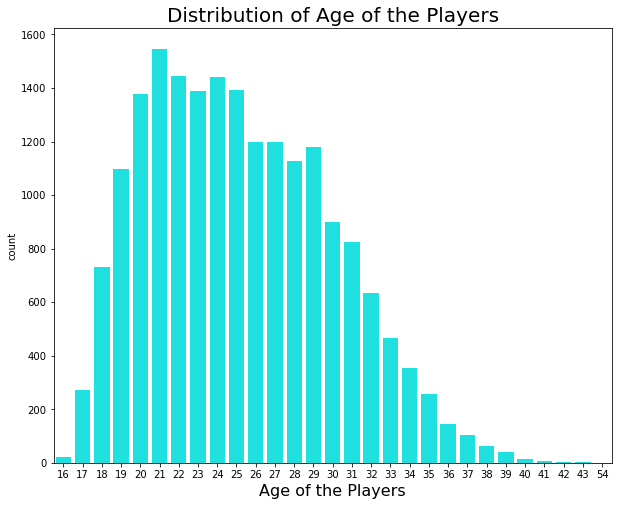

In [16]:
x = players_22['age']
plt.figure(figsize=(10,8))
ax = sns.countplot(x,color='#00ffff')
ax.set_xlabel(xlabel = 'Age of the Players', fontsize = 16)
ax.set_title(label = 'Distribution of Age of the Players', fontsize = 20)
plt.show()

In [17]:
#players_22.set_index('sofifa_id', inplace = True)

In [18]:
players_show = players_22.copy()
players_show['value_eur'] = players_show['value_eur'].apply(lambda x : "{:,}".format(int(x)))

In [19]:
players_show.columns

Index(['short_name', 'overall', 'potential', 'value_eur', 'age', 'skill_moves',
       'international_reputation', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_volleys', 'skill_dribbling',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_positioning', 'mentality_vision',
       'mentality_penalties', 'mentality_composure',
       'defending_marking_awareness', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'preferred_foot_Right'],
      dtype='object')

In [20]:
players_show [['skill_moves',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_volleys', 'skill_dribbling',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_positioning', 'mentality_vision',
       'mentality_penalties', 'mentality_composure',
       'defending_marking_awareness', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'preferred_foot_Right']] = players_show[['skill_moves',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_volleys', 'skill_dribbling',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_positioning', 'mentality_vision',
       'mentality_penalties', 'mentality_composure',
       'defending_marking_awareness', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'preferred_foot_Right']].apply(lambda x: round(x,1))
players_show = players_show.rename(columns={'value_eur':'Market Value (Euros)'})
players_show

,short_name,overall,potential,Market Value (Euros),age,skill_moves,international_reputation,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,preferred_foot_Right
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,93,93,"62,400,000",34,4.0,5,85.0,95.0,70.0,...,95.0,75.0,96.0,20.0,24.0,6.0,11.0,15.0,14.0,0
188545,R. Lewandowski,92,92,"95,600,000",32,4.0,5,71.0,95.0,90.0,...,81.0,90.0,88.0,35.0,19.0,15.0,6.0,12.0,8.0,1
20801,Cristiano Ronaldo,91,91,"36,000,000",36,5.0,5,87.0,95.0,90.0,...,76.0,88.0,95.0,24.0,24.0,7.0,11.0,15.0,14.0,1
190871,Neymar Jr,91,91,"103,200,000",29,5.0,5,85.0,83.0,63.0,...,90.0,93.0,93.0,35.0,29.0,9.0,9.0,15.0,15.0,1
192985,K. De Bruyne,91,91,"100,400,000",30,4.0,4,94.0,82.0,55.0,...,94.0,83.0,89.0,68.0,53.0,15.0,13.0,5.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261962,Song Defu,47,52,"56,000",22,2.0,1,46.0,32.0,48.0,...,43.0,42.0,37.0,38.0,48.0,6.0,10.0,5.0,15.0,1
262040,C. Porter,47,59,"88,000",19,2.0,1,54.0,33.0,46.0,...,49.0,44.0,47.0,37.0,47.0,11.0,12.0,6.0,8.0,1
262760,N. Logue,47,55,"80,000",21,2.0,1,39.0,32.0,43.0,...,46.0,39.0,36.0,38.0,48.0,8.0,6.0,7.0,10.0,1


In [21]:
players_22.dtypes

short_name                      object
overall                          int64
potential                        int64
value_eur                      float64
age                              int64
skill_moves                    float64
international_reputation         int64
attacking_crossing             float64
attacking_finishing            float64
attacking_heading_accuracy     float64
attacking_volleys              float64
skill_dribbling                float64
skill_fk_accuracy              float64
skill_long_passing             float64
skill_ball_control             float64
movement_acceleration          float64
movement_sprint_speed          float64
movement_agility               float64
movement_reactions             float64
movement_balance               float64
power_shot_power               float64
power_jumping                  float64
power_stamina                  float64
power_strength                 float64
power_long_shots               float64
mentality_aggression     

In [22]:
corr_matrix = players_22.corr()
corr_matrix

,overall,potential,value_eur,age,skill_moves,international_reputation,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_volleys,...,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,preferred_foot_Right
overall,1.000000,0.644275,0.553823,0.459451,0.376226,0.470815,0.401356,0.338746,0.343901,0.380942,...,0.523025,0.343690,0.708867,0.312093,0.233589,-0.010990,-0.011080,-0.012986,-0.002485,-0.048961
potential,0.644275,1.000000,0.526853,-0.264142,0.283746,0.358773,0.243757,0.230814,0.192825,0.235766,...,0.345298,0.208062,0.426790,0.161288,0.140869,-0.043093,-0.044989,-0.047030,-0.040184,-0.042915
value_eur,0.553823,0.526853,1.000000,0.042617,0.256689,0.632008,0.226934,0.217244,0.165578,0.237853,...,0.323736,0.195743,0.388250,0.140712,0.103281,-0.022038,-0.022424,-0.021551,-0.021243,-0.019993
age,0.459451,-0.264142,0.042617,1.000000,0.074076,0.230269,0.132175,0.088754,0.154516,0.148109,...,0.209636,0.151951,0.359076,0.163583,0.089482,0.109490,0.112420,0.112025,0.120686,0.003021
skill_moves,0.376226,0.283746,0.256689,0.074076,1.000000,0.208460,0.721700,0.740851,0.439020,0.741924,...,0.646033,0.693156,0.605913,0.234671,0.177433,-0.604961,-0.603081,-0.601639,-0.601882,-0.090886
international_reputation,0.470815,0.358773,0.632008,0.230269,0.208460,1.000000,0.181290,0.168329,0.147754,0.223521,...,0.279634,0.191203,0.360000,0.117593,0.078671,0.010358,0.010937,0.010236,0.013484,-0.001520
attacking_crossing,0.401356,0.243757,0.226934,0.132175,0.721700,0.181290,1.000000,0.682982,0.493130,0.698748,...,0.681170,0.660510,0.627092,0.465374,0.431552,-0.677740,-0.675595,-0.675874,-0.674395,-0.199483
attacking_finishing,0.338746,0.230814,0.217244,0.088754,0.740851,0.168329,0.682982,1.000000,0.496748,0.900288,...,0.713155,0.852509,0.607211,0.057259,-0.014740,-0.605657,-0.604279,-0.601335,-0.601135,-0.028673
attacking_heading_accuracy,0.343901,0.192825,0.165578,0.154516,0.439020,0.147754,0.493130,0.496748,1.000000,0.531206,...,0.282120,0.578952,0.569060,0.591080,0.544579,-0.748750,-0.749095,-0.745486,-0.744552,-0.044867
attacking_volleys,0.380942,0.235766,0.237853,0.148109,0.741924,0.223521,0.698748,0.900288,0.531206,1.000000,...,0.698189,0.850715,0.649909,0.132471,0.058476,-0.603146,-0.601622,-0.598669,-0.598384,-0.040161


Text(0.5, 1.0, 'Correlation Heatmap')

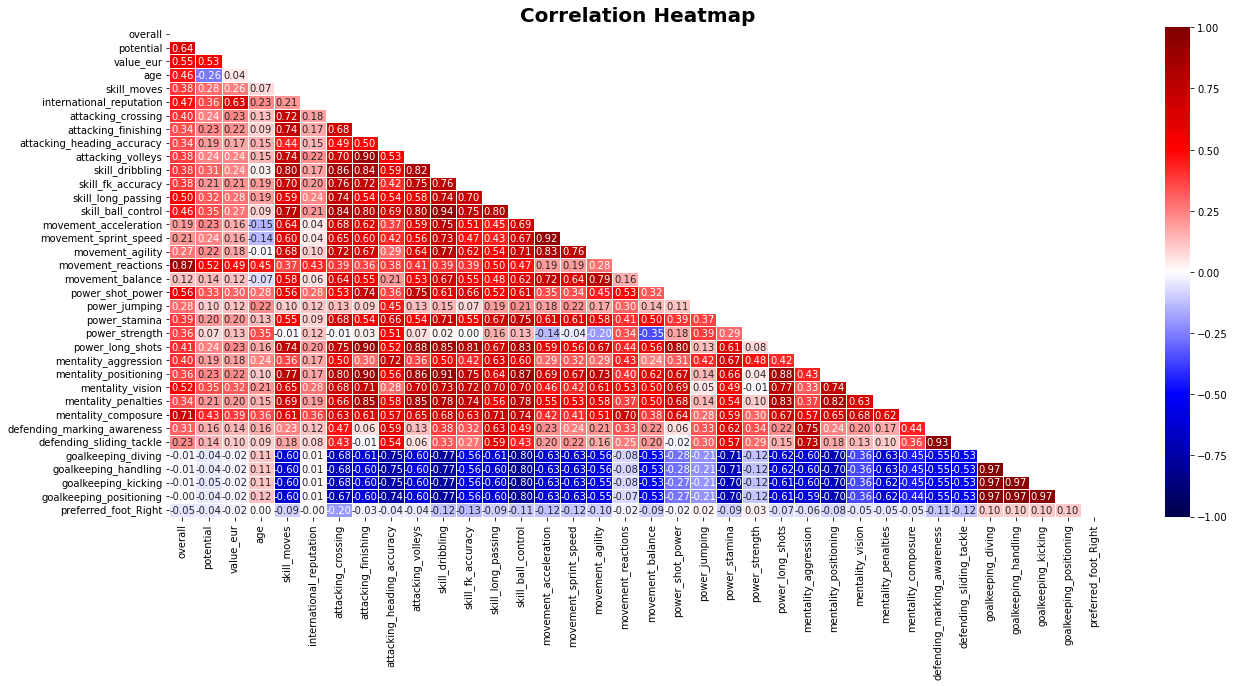

In [23]:
fig = plt.figure(figsize=[21,9])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=20)
#plt.savefig('heatmap1.png',transparent=True, bbox_inches='tight')

In [24]:
list_features = ['skill_moves',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_volleys', 'skill_dribbling',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_positioning', 'mentality_vision',
       'mentality_penalties', 'mentality_composure',
       'defending_marking_awareness', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'preferred_foot_Right']

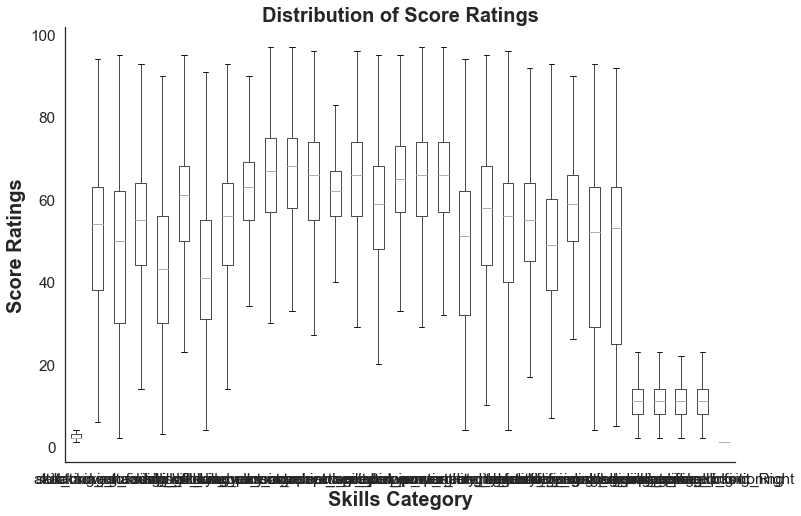

In [25]:
fig = plt.figure(figsize=[12,8])
sns.set(style = 'white', font_scale=1.4)
players_22[list_features].boxplot(showfliers=False)
plt.grid(False)
plt.xlabel('Skills Category',fontsize=20,weight='bold')
plt.ylabel('Score Ratings',fontsize=20,weight='bold')
plt.title('Distribution of Score Ratings',fontsize=20,weight='bold')
sns.despine()

In [26]:
#players_22 = players_22.drop(['preferred_foot_Right'],axis=1)

In [27]:
#sns.set(style='white',font_scale=1.8)
#sns.pairplot(players_22)
#plt.savefig('pairplot1.png',transparent=True, bbox_inches='tight')

In [28]:
l = list(players_22['value_eur'] == 0)
print('Zeros in output label: ',len([v for v in l if v==True] ))
print('\nNaN values in following features:')
players_22.isnull().any()

Zeros in output label:  0

NaN values in following features:


short_name                     False
overall                        False
potential                      False
value_eur                      False
age                            False
skill_moves                    False
international_reputation       False
attacking_crossing             False
attacking_finishing            False
attacking_heading_accuracy     False
attacking_volleys              False
skill_dribbling                False
skill_fk_accuracy              False
skill_long_passing             False
skill_ball_control             False
movement_acceleration          False
movement_sprint_speed          False
movement_agility               False
movement_reactions             False
movement_balance               False
power_shot_power               False
power_jumping                  False
power_stamina                  False
power_strength                 False
power_long_shots               False
mentality_aggression           False
mentality_positioning          False
m

In [29]:
y, X = patsy.dmatrices("Q('value_eur') ~ age + international_reputation + Q('skill_moves') + attacking_crossing + attacking_finishing + attacking_heading_accuracy + attacking_volleys + skill_dribbling + skill_fk_accuracy + skill_long_passing + skill_ball_control + movement_acceleration + movement_sprint_speed + movement_agility + movement_reactions + movement_balance + power_shot_power + power_jumping + power_stamina + power_strength + power_long_shots + mentality_aggression + mentality_positioning + mentality_vision + mentality_penalties + mentality_composure + defending_marking_awareness + defending_sliding_tackle + goalkeeping_diving + goalkeeping_handling + goalkeeping_kicking + goalkeeping_positioning + preferred_foot_Right", 
                       data=players_22, return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Q('value_eur')   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     653.0
Date:                Mon, 18 Jul 2022   Prob (F-statistic):               0.00
Time:                        07:21:26   Log-Likelihood:            -3.2058e+05
No. Observations:               19239   AIC:                         6.412e+05
Df Residuals:                   19205   BIC:                         6.415e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -1.999e+07   4.09e+05    -48.872      0.000   -2.08e+07   -1.92e+07
age                         -3.499e+05   8309.381    -42.111      0.000   -3.66e+05   -3.34e+05
international_reputation     8.443e+06   9.26e+04     91.166      0.000    8.26e+06    8.62e+06
Q('skill_moves')             5.243e+05   7.12e+04      7.361      0.000    3.85e+05    6.64e+05
attacking_crossing           1.276e+04   4130.406      3.090      0.002    4667.235    2.09e+04
attacking_finishing            3.7e+04   5525.010      6.697      0.000    2.62e+04    4.78e+04
attacking_heading_accuracy   1.957e+04   4524.332      4.325      0.000    1.07e+04    2.84e+04
attacking_volleys           -5442.0806   4697.328     -1.159      0.247   -1.46e+04    3765.094
skill_dribbling             -1.115e+04   6845.541     -1.629      0.103   -2.46e+04    2265.973
skill_fk_accuracy            4502.5863   3700.233      1.217      0.224   -2750.194    1.18e+04
skill_long_passing           6452.1527   4663.900      1.383      0.167   -2689.499    1.56e+04
skill_ball_control           2.636e+04   7655.013      3.444      0.001    1.14e+04    4.14e+04
movement_acceleration        3932.4401   6248.089      0.629      0.529   -8314.362    1.62e+04
movement_sprint_speed        2.625e+04   5549.341      4.731      0.000    1.54e+04    3.71e+04
movement_agility            -1.749e+04   4717.172     -3.708      0.000   -2.67e+04   -8247.212
movement_reactions           1.653e+05   6222.325     26.563      0.000    1.53e+05    1.77e+05
movement_balance             1.241e+04   4034.490      3.076      0.002    4501.959    2.03e+04
power_shot_power             -630.0011   4924.652     -0.128      0.898   -1.03e+04    9022.748
power_jumping               -8688.3166   3238.153     -2.683      0.007    -1.5e+04   -2341.254
power_stamina                3.263e+04   3708.753      8.797      0.000    2.54e+04    3.99e+04
power_strength               2.284e+04   3897.296      5.859      0.000    1.52e+04    3.05e+04
power_long_shots            -2.201e+04   5168.911     -4.258      0.000   -3.21e+04   -1.19e+04
mentality_aggression        -2943.0896   3546.374     -0.830      0.407   -9894.293    4008.114
mentality_positioning       -9296.1420   5286.180     -1.759      0.079   -1.97e+04    1065.234
mentality_vision             7126.2881   4816.136      1.480      0.139   -2313.761    1.66e+04
mentality_penalties         -1.821e+04   4392.553     -4.145      0.000   -2.68e+04   -9597.083
mentality_composure          2.459e+04   5065.319      4.854      0.000    1.47e+04    3.45e+04
defending_marking_awareness  1.132e+04   4708.902      2.404      0.016    2088.572    2.05e+04
defending_sliding_tackle    -2650.4079   4611.926     -0.575      0.566   -1.17e+04    6389.370
goalkeeping

In [30]:
players_22_norm = players_22.copy()

In [31]:
players_22_norm['value_eur'] = np.log1p(players_22['value_eur'])

In [32]:
players_22_norm

,short_name,overall,potential,value_eur,age,skill_moves,international_reputation,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,preferred_foot_Right
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,93,93,17.949076,34,4.0,5,85.0,95.0,70.0,...,95.0,75.0,96.0,20.0,24.0,6.0,11.0,15.0,14.0,0
188545,R. Lewandowski,92,92,18.375683,32,4.0,5,71.0,95.0,90.0,...,81.0,90.0,88.0,35.0,19.0,15.0,6.0,12.0,8.0,1
20801,Cristiano Ronaldo,91,91,17.399030,36,5.0,5,87.0,95.0,90.0,...,76.0,88.0,95.0,24.0,24.0,7.0,11.0,15.0,14.0,1
190871,Neymar Jr,91,91,18.452179,29,5.0,5,85.0,83.0,63.0,...,90.0,93.0,93.0,35.0,29.0,9.0,9.0,15.0,15.0,1
192985,K. De Bruyne,91,91,18.424673,30,4.0,4,94.0,82.0,55.0,...,94.0,83.0,89.0,68.0,53.0,15.0,13.0,5.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261962,Song Defu,47,52,10.933125,22,2.0,1,46.0,32.0,48.0,...,43.0,42.0,37.0,38.0,48.0,6.0,10.0,5.0,15.0,1
262040,C. Porter,47,59,11.385103,19,2.0,1,54.0,33.0,46.0,...,49.0,44.0,47.0,37.0,47.0,11.0,12.0,6.0,8.0,1
262760,N. Logue,47,55,11.289794,21,2.0,1,39.0,32.0,43.0,...,46.0,39.0,36.0,38.0,48.0,8.0,6.0,7.0,10.0,1


In [33]:
players_22_norm = players_22_norm.rename(columns={'value_eur':'Log Market Value'})

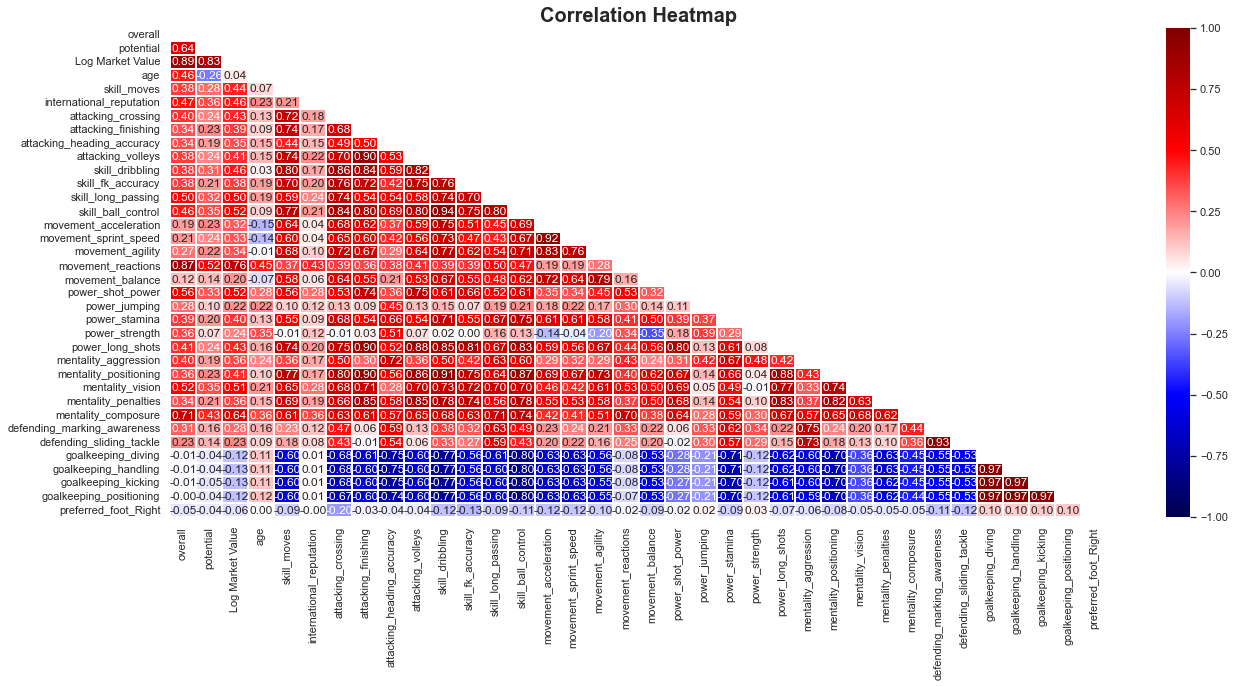

In [34]:
sns.set(font_scale=1,style='white')
corr_matrix = players_22_norm.corr()
fig = plt.figure(figsize=[21,9])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1.5,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=20)
plt.savefig('heatmap3.png',transparent=True, bbox_inches='tight')

In [35]:
#sns.set(style='white',font_scale=1.8)
#sns.pairplot(players_22_norm)
#plt.savefig('pairplot2.png',transparent=True, bbox_inches='tight')

In [36]:
y, X = patsy.dmatrices("Q('Log Market Value') ~ age + international_reputation + Q('skill_moves') + attacking_crossing + attacking_finishing + attacking_heading_accuracy + attacking_volleys + skill_dribbling + skill_fk_accuracy + skill_long_passing + skill_ball_control + movement_acceleration + movement_sprint_speed + movement_agility + movement_reactions + movement_balance + power_shot_power + power_jumping + power_stamina + power_strength + power_long_shots + mentality_aggression + mentality_positioning + mentality_vision + mentality_penalties + mentality_composure + defending_marking_awareness + defending_sliding_tackle + goalkeeping_diving + goalkeeping_handling + goalkeeping_kicking + goalkeeping_positioning + preferred_foot_Right", 
                       data=players_22_norm, return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q('Log Market Value')   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.835
Method:                    Least Squares   F-statistic:                     2947.
Date:                   Mon, 18 Jul 2022   Prob (F-statistic):               0.00
Time:                           07:21:35   Log-Likelihood:                -13934.
No. Observations:                  19239   AIC:                         2.794e+04
Df Residuals:                      19205   BIC:                         2.820e+04
Df Model:                             33                                         
Covariance Type:               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       5.9972      0.049    122.587      0.000       5.901       6.093
age                            -0.1130      0.001   -113.624      0.000      -0.115      -0.111
international_reputation        0.4457      0.011     40.231      0.000       0.424       0.467
Q('skill_moves')                0.2018      0.009     23.683      0.000       0.185       0.219
attacking_crossing              0.0076      0.000     15.420      0.000       0.007       0.009
attacking_finishing             0.0058      0.001      8.802      0.000       0.005       0.007
attacking_heading_accuracy      0.0153      0.001     28.278      0.000       0.014       0.016
attacking_volleys              -0.0015      0.001     -2.632      0.008      -0.003      -0.000
skill_dribbling                 0.0053      0.001      6.481      0.000       0.004       0.007
skill_fk_accuracy              -0.0005      0.000     -1.074      0.283      -0.001       0.000
skill_long_passing              0.0020      0.001      3.672      0.000       0.001       0.003
skill_ball_control              0.0331      0.001     36.141      0.000       0.031       0.035
movement_acceleration           0.0043      0.001      5.794      0.000       0.003       0.006
movement_sprint_speed           0.0051      0.001      7.728      0.000       0.004       0.006
movement_agility               -0.0027      0.001     -4.709      0.000      -0.004      -0.002
movement_reactions              0.0565      0.001     75.939      0.000       0.055       0.058
movement_balance               -0.0030      0.000     -6.298      0.000      -0.004      -0.002
power_shot_power                0.0081      0.001     13.800      0.000       0.007       0.009
power_jumping                  -0.0004      0.000     -0.968      0.333      -0.001       0.000
power_stamina                   0.0067      0.000     15.030      0.000       0.006       0.008
power_strength                  0.0052      0.000     11.107      0.000       0.004       0.006
power_long_shots               -0.0067      0.001    -10.758      0.000      -0.008      -0.005
mentality_aggression        -7.063e-05      0.000     -0.166      0.868      -0.001       0.001
mentality_positioning          -0.0083      0.001    -13.048      0.000      -0.009      -0.007
mentality_vision               -0.0046      0.001     -8.034      0.000      -0.006      -0.003
mentality_penalties            -0.0015      0.001     -2.798      0.005      -0.003      -0.000
mentality_composure             0.0136      0.001     22.373      0.000       0.012       0.015
defending_marking_awareness     0.0051      0.001      9.072      0.000       0.004       0.006
defending_sliding_tackle        0.0008      0.001      1.393      0.164   

In [37]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(pred,y,alpha=0.1)
    plt.plot(y, y, color='red',linewidth=1,)
    plt.title("Regression fit")
    plt.xlabel("Predicted y")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res,alpha=0.1)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt,)
    plt.title("Normal Q-Q plot")
    
    lin_mse = mean_squared_error(y, pred)
    lin_rmse = np.sqrt(lin_mse)
    lin_rmse
    
    score = r2_score(y, pred)  
    print('Accuracy:',format(score*100,'.2f'),'%')

In [38]:
y = players_22_norm['Log Market Value']
X = players_22_norm.drop(['short_name','Log Market Value'],axis=1)

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Log Market Value'>

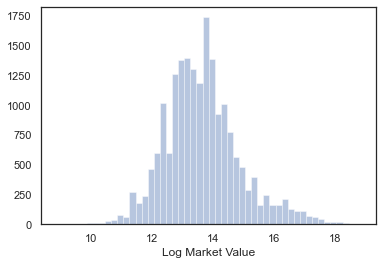

In [39]:
sns.distplot(y,kde=False)

Accuracy: 95.96 %


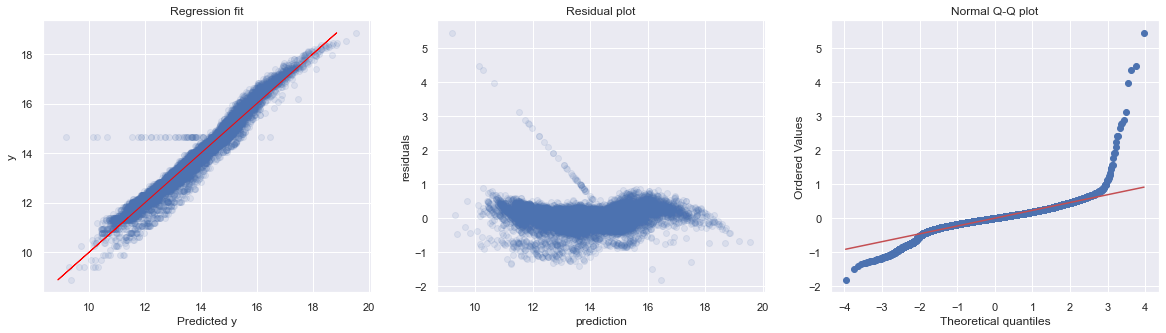

In [40]:
sns.set(style='darkgrid')
diagnostic_plot(X, y)

# Analysis of the target variable 

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


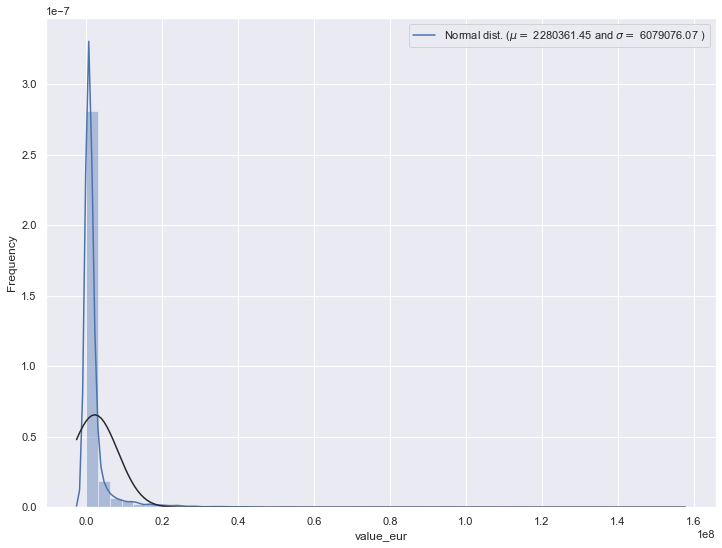

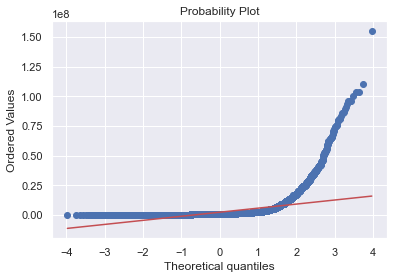

In [41]:
plt.subplots(figsize=(12,9))
sns.distplot(players_22['value_eur'], fit=stats.norm)

# Getting the fitted parameters used by the function:
(mu, sigma) = stats.norm.fit(players_22['value_eur'])

# plotting with the distribution:
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

# Probablity plot:
fig = plt.figure()
stats.probplot(players_22['value_eur'], plot=plt)
plt.show()

In [42]:
# analysis of the kurtosis and the skewness to check the normality of the variable:
kurt = players_22['value_eur'].kurtosis()
skew = players_22['value_eur'].skew()
print('Death Kurtorsis {}'.format(kurt))
print('Death Skewness {}'.format(skew))

Death Kurtorsis 98.28700716867866
Death Skewness 8.202130312464618


# Normalization

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


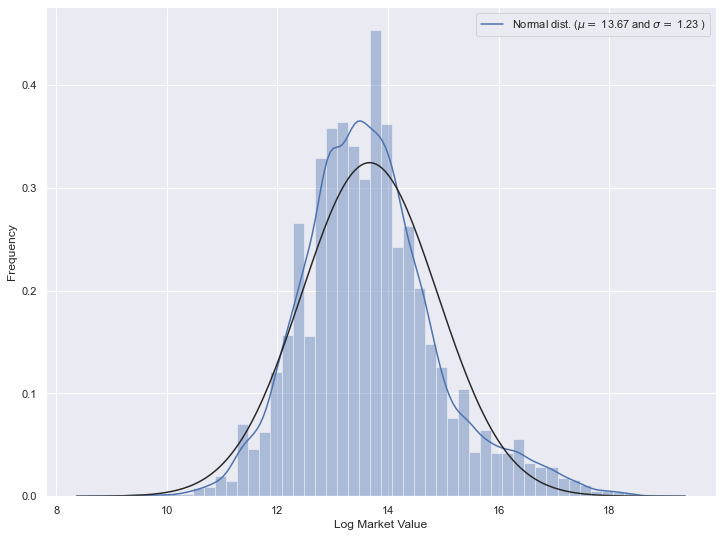

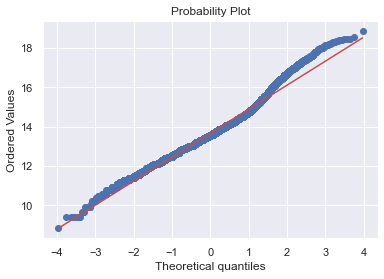

In [43]:
# Using log function for normalize the target variable:
#players_22_norm['Log Market Value'] = np.log(players_22_norm['Log Market Value'])

# Checking to see the  normal distribution of the variable now:

plt.subplots(figsize=(12,9))
sns.distplot(players_22_norm['Log Market Value'], fit=stats.norm)

# Getting the fitted parameters used by the function:

(mu, sigma) = stats.norm.fit(players_22_norm['Log Market Value'])

# plotting with the distribution now:

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

# Probablity plot:

fig = plt.figure()
stats.probplot(players_22_norm['Log Market Value'], plot=plt)
plt.show()

In [44]:
# after normalize the variable. we check again the analysis of the kurtosis and the skewness to check the normality of the variable:

kurt = players_22_norm['Log Market Value'].kurtosis()
skew = players_22_norm['Log Market Value'].skew()
print('Death Kurtorsis {}'.format(kurt))
print('Death Skewness {}'.format(skew))

Death Kurtorsis 0.8421533154160796
Death Skewness 0.5806627737587468


In [45]:
X

,overall,potential,age,skill_moves,international_reputation,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_volleys,skill_dribbling,...,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,preferred_foot_Right
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,93,93,34,4.0,5,85.0,95.0,70.0,88.0,96.0,...,95.0,75.0,96.0,20.0,24.0,6.0,11.0,15.0,14.0,0
188545,92,92,32,4.0,5,71.0,95.0,90.0,89.0,85.0,...,81.0,90.0,88.0,35.0,19.0,15.0,6.0,12.0,8.0,1
20801,91,91,36,5.0,5,87.0,95.0,90.0,86.0,88.0,...,76.0,88.0,95.0,24.0,24.0,7.0,11.0,15.0,14.0,1
190871,91,91,29,5.0,5,85.0,83.0,63.0,86.0,95.0,...,90.0,93.0,93.0,35.0,29.0,9.0,9.0,15.0,15.0,1
192985,91,91,30,4.0,4,94.0,82.0,55.0,82.0,88.0,...,94.0,83.0,89.0,68.0,53.0,15.0,13.0,5.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261962,47,52,22,2.0,1,46.0,32.0,48.0,30.0,45.0,...,43.0,42.0,37.0,38.0,48.0,6.0,10.0,5.0,15.0,1
262040,47,59,19,2.0,1,54.0,33.0,46.0,32.0,41.0,...,49.0,44.0,47.0,37.0,47.0,11.0,12.0,6.0,8.0,1
262760,47,55,21,2.0,1,39.0,32.0,43.0,37.0,47.0,...,46.0,39.0,36.0,38.0,48.0,8.0,6.0,7.0,10.0,1


In [155]:
players_22_norm.to_csv("players_22_norm.csv")

# Feature Selection

In [46]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)

sel_ = SelectFromModel(LinearRegression()) 
sel_.fit(X_norm, y)

SelectFromModel(estimator=LinearRegression())

In [47]:
sel_.get_support()

array([ True, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [48]:
selected_feat = X.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 35
selected features: 3
features with coefficients shrank to zero: 0


In [49]:
selected_feat

Index(['overall', 'age', 'international_reputation'], dtype='object')

# Modeling

In [50]:
X_model = X[selected_feat]
X_model.shape

(19239, 3)

In [51]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_model, y, test_size=0.25,random_state=42)
#X_train_val = X[3848:]
#X_test = X[:3848]
#y_train_val = y[3848:]
#y_test = y[:3848]

In [52]:
rgr = LinearRegression()
rgr.fit(X_train_val,y_train_val)
pred = rgr.predict(X_test)

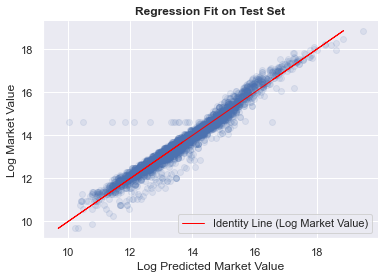

In [53]:
plt.scatter(pred,y_test,alpha=0.1)
plt.plot(y_test, y_test, color='red',linewidth=1,label='Identity Line (Log Market Value)')
plt.title("Regression Fit on Test Set",weight='bold')
plt.xlabel("Log Predicted Market Value")
plt.ylabel("Log Market Value")
plt.legend(loc='lower right')
sns.despine()

In [54]:
lin_mse = mean_squared_error(pred, y_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.2722827570443607

In [55]:
score = r2_score(y_test, pred)  
print('Accuracy:',format(score*100,'.2f'),'%')

Accuracy: 94.96 %


In [56]:
print('Precisión del modelo:')
print(rgr.score(X_test, y_test))

Precisión del modelo:
0.9496199304823063


In [57]:
# define some handy analysis support function
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

def plot_prediction_analysis(y, y_pred, figsize=(10,4), title=''):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(y, y_pred)
    mn = min(np.min(y), np.min(y_pred))
    mx = max(np.max(y), np.max(y_pred))
    axs[0].plot([mn, mx], [mn, mx], c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    evs = explained_variance_score(y, y_pred)
    r2 = r2_score(y, y_pred)
    axs[0].set_title('rmse = {:.2f}, evs = {:.2f}, r2 = {:,.2f}'.format(rmse, evs, r2))
    
    axs[1].hist(y-y_pred, bins=50)
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$y - \hat{y}$')
    axs[1].set_title('Histrogram prediction error, $\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(avg, std))
    
    if title!='':
        fig.suptitle(title)

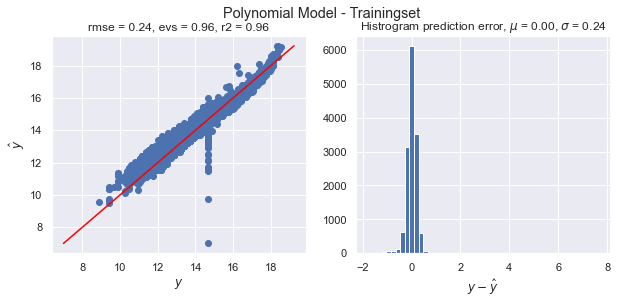

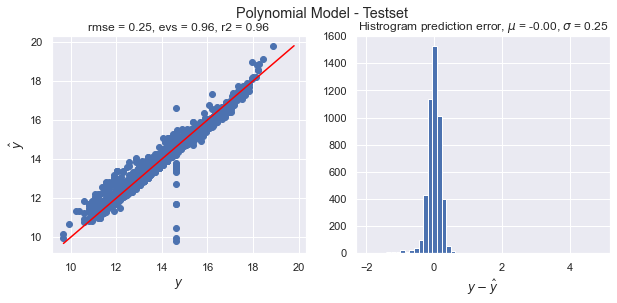

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

#model = LinearRegression()
model = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("poly", PolynomialFeatures(degree=2)),
        ("lin_reg", Lasso(alpha=0.01))
    ))

model.fit(X_train_val, y_train_val)

y_train_pred = model.predict(X_train_val)

plot_prediction_analysis(y_train_val, y_train_pred, title='Polynomial Model - Trainingset')

y_test_pred = model.predict(X_test)
plot_prediction_analysis(y_test, y_test_pred, title='Polynomial Model - Testset')

# LASSO

In [59]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
X_norm_lasso = MinMaxScaler().fit_transform(X)

sel_ = SelectFromModel(Lasso(alpha=.0001, random_state=42)) 
sel_.fit(X_norm_lasso, y)

SelectFromModel(estimator=Lasso(alpha=0.0001, random_state=42))

In [60]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True])

In [61]:
selected_feat = X.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 35
selected features: 27
features with coefficients shrank to zero: 8


In [62]:
selected_feat

Index(['overall', 'potential', 'age', 'skill_moves',
       'international_reputation', 'attacking_crossing', 'attacking_finishing',
       'attacking_volleys', 'skill_fk_accuracy', 'skill_ball_control',
       'movement_acceleration', 'movement_agility', 'movement_reactions',
       'movement_balance', 'power_shot_power', 'power_stamina',
       'power_strength', 'power_long_shots', 'mentality_aggression',
       'mentality_positioning', 'mentality_penalties', 'mentality_composure',
       'defending_marking_awareness', 'defending_sliding_tackle',
       'goalkeeping_kicking', 'goalkeeping_positioning',
       'preferred_foot_Right'],
      dtype='object')

In [63]:
X_model_lasso = X[selected_feat]
X_model_lasso.shape

(19239, 27)

In [64]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_model_lasso, y, test_size=0.25,random_state=42)
#X_train_val = X[3848:]
#X_test = X[:3848]
#y_train_val = y[3848:]
#y_test = y[:3848]

In [65]:
#############SEGUIR AQUI

In [66]:
from sklearn.linear_model import Lasso
# Train model with default alpha=1
lasso_model = Lasso(alpha = 0.1)    
lasso_model.fit(X_train_val, y_train_val)
list(zip(selected_feat, lasso_model.coef_))
## doing feature selection with Lasso

[('overall', 0.16924806013355392),
 ('potential', 0.018581025368317357),
 ('age', -0.09291538278023011),
 ('skill_moves', 0.0),
 ('international_reputation', 0.0),
 ('attacking_crossing', 0.0),
 ('attacking_finishing', 0.0009255775163952073),
 ('attacking_volleys', 0.0014066624112178624),
 ('skill_fk_accuracy', 0.0),
 ('skill_ball_control', 0.00020538053909497752),
 ('movement_acceleration', 0.0),
 ('movement_agility', -0.0),
 ('movement_reactions', 0.0014897820505778926),
 ('movement_balance', -0.0),
 ('power_shot_power', 0.0),
 ('power_stamina', 0.0005613415230456829),
 ('power_strength', 0.0),
 ('power_long_shots', 0.0),
 ('mentality_aggression', 0.0),
 ('mentality_positioning', 0.0011370584089018087),
 ('mentality_penalties', 0.0),
 ('mentality_composure', 0.0),
 ('defending_marking_awareness', 0.0),
 ('defending_sliding_tackle', -0.0),
 ('goalkeeping_kicking', -0.0),
 ('goalkeeping_positioning', -0.0017250938735167117),
 ('preferred_foot_Right', 0.0)]

In [67]:
std = StandardScaler()
std.fit(X_train_val.values)
X_tr = std.transform(X_train_val.values)
X_te = std.transform(X_test.values)
## Scaling x values for lasso,ridge,elastic net

In [68]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)

In [69]:
alphavec = 10**np.linspace(-15,4,400)
lasso_model = LassoCV(alphas = alphavec, cv=kf)
lasso_model.fit(X_tr, y_train_val)
lasso_model.alpha_
## finding alpha value that gives lowest MAE for Lasso CV

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.9527463606845, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.054107489585135, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.524068057307545, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packa

0.00024040991835099645

In [70]:
test_predictions = lasso_model.predict(X_te)
test_mae = mean_absolute_error(test_predictions, y_test)
print("Validation MAE: {:,.0f}".format(test_mae))

Validation MAE: 0


In [71]:
score = r2_score(y_test, test_predictions)  
print('Accuracy:',format(score*100,'.2f'),'%')

Accuracy: 95.55 %


# RIDGE

In [72]:
alphavec = 10**np.linspace(-2,2,200)
ridge_model = RidgeCV(alphas = alphavec, cv=kf)
ridge_model.fit(X_tr, y_train_val)
ridge_model.alpha_
## finding alpha value that gives lowest MAE for Ridge CV

1.1226677735108135

In [73]:
list(zip(X_train_val.columns, ridge_model.coef_))
# finding coefficients for optimum alpha value for Ridge

[('overall', 1.2833594965471307),
 ('potential', 0.022203805613428437),
 ('age', -0.5450782777289849),
 ('skill_moves', 0.027942958988821504),
 ('international_reputation', 0.07464492467119323),
 ('attacking_crossing', -0.002178643869242146),
 ('attacking_finishing', 0.013802785876486267),
 ('attacking_volleys', 0.013716689725880908),
 ('skill_fk_accuracy', 0.014603689888122749),
 ('skill_ball_control', -0.02745666898213154),
 ('movement_acceleration', -0.009484539998981642),
 ('movement_agility', -0.015811485902073038),
 ('movement_reactions', 0.01369158111827288),
 ('movement_balance', 0.003133919353698247),
 ('power_shot_power', -0.004202627964621327),
 ('power_stamina', 0.01748361550002134),
 ('power_strength', 0.005074931347129497),
 ('power_long_shots', -0.004398028495677699),
 ('mentality_aggression', 0.0034204553305591237),
 ('mentality_positioning', 0.02794713295428091),
 ('mentality_penalties', -0.012768937728240837),
 ('mentality_composure', -0.01682940951977193),
 ('defendi

In [74]:
ridge_model_final = Ridge(alpha = 0.9329304026284686) 
Mean_R2_Ridge_CV = np.mean(cross_val_score(ridge_model_final, X_tr, y_train_val, cv=kf, scoring='r2'))
Mean_R2_Ridge_CV
# scoring the Ridge model based on CV

0.9604602880053733

In [75]:
Std_R2_Ridge_CV = np.std(cross_val_score(ridge_model_final, X_tr, y_train_val, cv=kf, scoring='r2'))
Std_R2_Ridge_CV

0.0060794424330485155

In [76]:
Mean_MAE_Ridge_CV = -np.mean(cross_val_score(ridge_model_final, X_tr, y_train_val, cv=kf, scoring='neg_mean_absolute_error'))
Mean_MAE_Ridge_CV
# scoring the Ridge model based on CV

0.16556451060233288

In [77]:
Std_MAE_Ridge_CV = np.std(cross_val_score(ridge_model_final, X_tr, y_train_val, cv=kf, scoring='neg_mean_absolute_error'))
Std_MAE_Ridge_CV

0.004666251487467423

In [78]:
from sklearn.model_selection import GridSearchCV

price_model_ridgecv = Ridge(random_state=1)
parameters = [{"alpha": [6000, 10000, 50000]}]

grid = GridSearchCV(estimator=price_model_ridgecv, param_grid=parameters, cv=kf)
grid.fit(X_tr, y_train_val)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

price_model_ridgecv = Ridge(alpha=grid.best_params_["alpha"], random_state=1)
price_model_ridgecv.fit(X_tr, y_train_val)
test_predictions = price_model_ridgecv.predict(X_te)
test_mae = mean_absolute_error(test_predictions, y_test)
print("Validation MAE: {:,.0f}".format(test_mae))
#Best estimator:  Ridge(alpha=6000, random_state=1)
#Best score:  0.5252214885053264
#Validation MAE: 6,060,204

Best estimator:  Ridge(alpha=6000, random_state=1)
Best score:  0.8909395209728771
Validation MAE: 0


In [79]:
test_predictions_ridge = price_model_ridgecv.predict(X_te)
test_mae = mean_absolute_error(test_predictions_ridge, y_test)
print("Validation MAE: {:,.0f}".format(test_mae))

Validation MAE: 0


In [80]:
score = r2_score(y_test, test_predictions_ridge)  
print('Accuracy:',format(score*100,'.2f'),'%')

Accuracy: 89.69 %


# ElasticNetCV

In [81]:
alphavec = 10**np.linspace(-22,-17,300)
elastic_model = ElasticNetCV(alphas = alphavec, cv=kf)
elastic_model.fit(X_tr, y_train_val)
elastic_model.alpha_
## finding alpha value that gives lowest MAE for ElasticNet CV

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.2969812107251, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 316.5168396908862, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 315.21886562556455, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pack

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317.9444065060897, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 318.07493810779476, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 318.8402462796732, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pack

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320.5569139777335, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 318.9566584341253, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320.2254887788044, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packa

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.17067560810546, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320.9542382557155, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320.9712501922183, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pack

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.24550483660795, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.3282131136222, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.306483881582, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packa

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.36314053925076, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.3546753731163, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.3662345781426, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pack

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.38844868912634, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.39434156420384, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.39473967580585, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pa

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.40074397234787, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.3999038995068, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.3994071767462, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pack

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.40312484023514, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.4031913900441, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.4037991824538, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pack

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.40448706591354, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.40450216082223, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.4043316839766, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pac

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.4047296952404, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.4047608025911, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.4047049921398, tolerance: 1.7503618312630373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packa

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348.9981119518475, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 347.94334069881603, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350.37036426894105, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pac

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 351.4746485157906, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.0731602023604, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 351.56002160805537, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pack

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.37573320796275, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.38524292740397, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.3477773645428, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pac

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.54183357873245, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.5450827293664, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.50853677792503, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pac

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.60565863421647, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.59947306244294, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.59513461752937, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pa

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.6179789912415, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.6137482164093, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.60985053744685, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pack

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.62150996880615, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.6231834494147, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.6241823929314, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pack

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.62592808922636, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.62649973584746, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.626046274536, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pack

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.62682657346915, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.62702029100853, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.62687816028864, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pa

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.62729471831193, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.62735813730757, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.6274170903221, tolerance: 1.7391765867728213
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pac

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.1776701029159, tolerance: 1.7676734537315724
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.236894849801, tolerance: 1.7676734537315724
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 351.42140772102414, tolerance: 1.7676734537315724
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packa

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.37725771505274, tolerance: 1.7676734537315724
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.0896308919249, tolerance: 1.7676734537315724
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.7966529100265, tolerance: 1.7676734537315724
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pack

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.38654501836356, tolerance: 1.7676734537315724
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.4000679391198, tolerance: 1.7676734537315724
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.58201069782365, tolerance: 1.7676734537315724
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pac

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.70787297211325, tolerance: 1.7676734537315724
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.7094960893208, tolerance: 1.7676734537315724
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.7110550463649, tolerance: 1.7676734537315724
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pack

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.7424713759287, tolerance: 1.7676734537315724
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.7427877819321, tolerance: 1.7676734537315724
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.74520740187813, tolerance: 1.7676734537315724
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pack

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.7489479249666, tolerance: 1.7676734537315724
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.74810558671754, tolerance: 1.7676734537315724
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.7490887475903, tolerance: 1.7676734537315724
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pack

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.7496038686724, tolerance: 1.7676734537315724
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.75039900128724, tolerance: 1.7676734537315724
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.7499840257243, tolerance: 1.7676734537315724
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pack

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.7505179863523, tolerance: 1.7676734537315724
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.75053044760847, tolerance: 1.7676734537315724
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.75054243822376, tolerance: 1.7676734537315724
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pac

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.3726762501159, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 335.27262042252477, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.423059580146, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packa

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 336.99940515664196, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 335.9213494159866, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.03170732015894, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pac

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 338.9888762826828, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 338.791227194836, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 338.1924282206872, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packag

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 338.9799805138843, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.1441324449776, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.15523008953375, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pack

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.2820974303859, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.3379677738113, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.34174377112134, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pack

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.3888478311264, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.40645019173877, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.4076398706326, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pack

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.4218717544598, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.42557276188336, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.42802468632067, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pac

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.4300707172995, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.43415729193583, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.432477472187, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packa

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.4371109310262, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.43593669683924, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.4363993554201, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pack

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.43749052020615, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.437069126699, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.43731328406665, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pack

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.4377225072215, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.4378745546814, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.43773909829116, tolerance: 1.7872741278316915
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pack

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 351.43822359547147, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.76986047982075, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.71130226135233, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354.3687765802622, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.9794740804235, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.62780577348576, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\s

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354.94103096769305, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354.81005572233613, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354.9628031538462, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.13989044831743, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.0969404237919, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.10225505805613, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.18919695955526, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.19099410108265, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.219154671523, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\s

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.21754905587625, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.2205878747722, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.22898758902846, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.2314764050838, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.233376453087, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.23285059456, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklea

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.23566314163236, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.23516971113577, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.235745632963, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\s

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.23659578247157, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.23655921115034, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.236567404739, tolerance: 1.75541012982956
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\s

1e-17

# Linear Regression

In [82]:
lm = LinearRegression()

Mean_R2_Linear_CV = np.mean(cross_val_score(lm, X_train_val, y_train_val, cv=kf, scoring='r2'))
Mean_R2_Linear_CV 
# scoring the LR model based on CV

0.9604601022675523

In [83]:
Std_R2_Linear_CV = np.std(cross_val_score(lm, X_train_val, y_train_val, cv=kf, scoring='r2'))
Std_R2_Linear_CV 

0.006083765935645038

In [84]:
Mean_MAE_Linear_CV = - np.mean(cross_val_score(lm, X_train_val, y_train_val, cv=kf, scoring='neg_mean_absolute_error'))
Mean_MAE_Linear_CV 

0.1656013757409353

In [85]:
Std_MAE_Linear_CV = np.std(cross_val_score(lm, X_train_val, y_train_val, cv=kf, scoring='neg_mean_absolute_error'))
Std_MAE_Linear_CV 

0.0046670662837472

In [86]:
X_train_val = X_train_val.reset_index().drop('sofifa_id',axis=1)
y_train_val = y_train_val.reset_index().drop('sofifa_id',axis=1)

In [87]:
err_vector = []

for degree in range(2,5):
    mae = []
    for train_index, test_index in kf.split(X_train_val):
    #for sofifa_id in kf.split(X_train_val):
        
        X_train1, X_test1 = X_train_val.loc[train_index], X_train_val.loc[test_index]
        y_train1, y_test1 = y_train_val.loc[train_index], y_train_val.loc[test_index]

        #X_train1, X_test1 = X_train_val.loc[sofifa_id], X_train_val.loc[sofifa_id]
        #y_train1, y_test1 = y_train_val.loc[sofifa_id], y_train_val.loc[sofifa_id]         
        
        poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        poly.fit(X_train1,y_train1)
        
        predict = poly.predict(X_test1)
        mae.append(mean_absolute_error(y_test1, predict))
    err_vector.append(np.mean(mae))
    print(degree)

2
3
4


In [88]:
err_vector

[0.11510647800404632, 0.1381588779190755, 0.41216984857172967]

In [89]:
poly = make_pipeline(PolynomialFeatures(4), LinearRegression())

Mean_R2_Poly_CV = np.mean(cross_val_score(poly, X_train_val, y_train_val, cv=kf, scoring='r2'))
Mean_R2_Poly_CV 

0.6880079931353491

In [90]:
Std_R2_Poly_CV = np.std(cross_val_score(poly, X_train_val, y_train_val, cv=kf, scoring='r2'))
Std_R2_Poly_CV

0.01643340900128889

In [91]:
Mean_MAE_Poly_CV =  - np.mean(cross_val_score(poly, X_train_val, y_train_val, cv=kf, scoring='neg_mean_absolute_error'))
Mean_MAE_Poly_CV 

0.41216984857172967

In [92]:
Std_MAE_Poly_CV = np.std(cross_val_score(poly, X_train_val, y_train_val, cv=kf, scoring='neg_mean_absolute_error'))
Std_MAE_Poly_CV 

0.015284981599489182

In [93]:
print(f'Mean R2 Linear is: {Mean_R2_Linear_CV:.3f} +- {Std_R2_Linear_CV:.3f}')
print(f'Mean R2 Ridge is: {Mean_R2_Ridge_CV:.3f} +- {Std_R2_Ridge_CV:.3f}')
print(f'Mean R2 Poly is: {Mean_R2_Poly_CV:.3f} +- {Std_R2_Poly_CV:.3f}')

Mean R2 Linear is: 0.960 +- 0.006
Mean R2 Ridge is: 0.960 +- 0.006
Mean R2 Poly is: 0.688 +- 0.016


In [94]:
print(f'Mean MAE Linear is: {Mean_MAE_Linear_CV:.3f} +- {Std_MAE_Linear_CV:.3f}')
print(f'Mean MAE Ridge is: {Mean_MAE_Ridge_CV:.3f} +- {Std_MAE_Ridge_CV:.3f}')
print(f'Mean MAE Poly is: {Mean_MAE_Poly_CV:.3f} +- {Std_MAE_Poly_CV:.3f}')

Mean MAE Linear is: 0.166 +- 0.005
Mean MAE Ridge is: 0.166 +- 0.005
Mean MAE Poly is: 0.412 +- 0.015


In [95]:
poly = make_pipeline(PolynomialFeatures(4), LinearRegression())
poly.fit(X_train_val,y_train_val)
predicted = poly.predict(X_test)
print('R2 score on test set is: {}'.format(r2_score(y_test, predicted)))
print('MSE score on test set is: {}'.format(mean_absolute_error(y_test, predicted)))

R2 score on test set is: 0.48137827058518257
MSE score on test set is: 0.47826264678141195


In [96]:
def diagnostic_plot2(x_train, y_train, x_test, y_test):
    plt.figure(figsize=(22,8))
    
  #  poly = make_pipeline(PolynomialFeatures(4), LinearRegression())
  #  poly.fit(x_train,y_train)
  #  pred = poly.predict(x_test)
    
    rgr = LinearRegression()
    rgr.fit(x_train,y_train)
    pred = rgr.predict(x_test)    

    plt.subplot(1, 2, 1)
    plt.scatter(pred,y_test,alpha=0.1)
    plt.plot(y_test, y_test, color='red',linewidth=1,label='Identity Line (Log Market Value)')
    plt.title("Regression Fit on Test Set",weight='bold')
    plt.xlabel("Log Predicted Market Value")
    plt.ylabel("Log Market Value")
    plt.legend(loc='lower right')
    sns.despine()
    
    plt.subplot(1, 2, 2)
    res = np.array(y_test).reshape(-1,1) - pred
    plt.scatter(pred, res,alpha=0.1)
    plt.title("Residual Plot on Test Set",weight='bold')
    plt.xlabel("Log Predicted Market Value")
    plt.ylabel("Residuals")
    sns.despine()
    
 #   plt.subplot(1, 3, 3)
 #   #Generates a probability plot of sample data against the quantiles of a 
 #   # specified theoretical distribution 
 #   stats.probplot(res.T[0], dist="norm", plot=plt,)
 #   plt.title("Normal Q-Q plot")

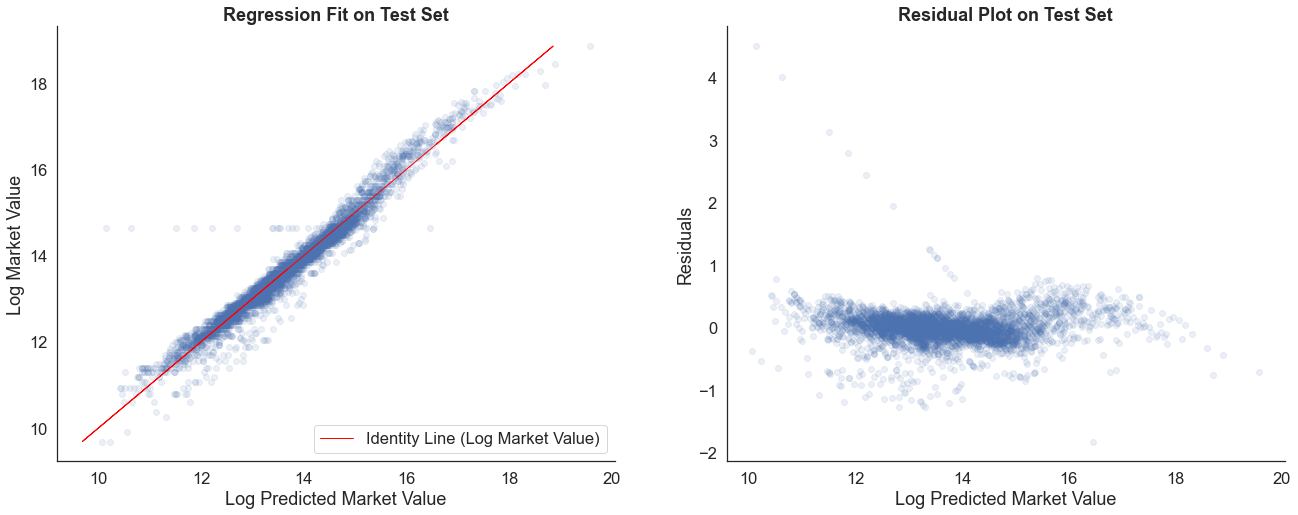

In [97]:
sns.set(style='white',font_scale=1.5)
diagnostic_plot2(X_train_val, y_train_val,X_test,y_test)
plt.savefig('regression1.png',transparent=True, bbox_inches='tight')

In [98]:
poly = make_pipeline(PolynomialFeatures(4), LinearRegression())
poly.fit(X_train_val,y_train_val)
predicted = poly.predict(X_test)
predicted

array([[13.66149472],
       [12.35810834],
       [13.42018179],
       ...,
       [12.30523666],
       [11.82917953],
       [16.13225876]])

In [99]:
rgr = LinearRegression()
rgr.fit(X_train_val,y_train_val)
predicted = rgr.predict(X_test)    
predicted

array([[13.60182565],
       [12.4206518 ],
       [12.15018346],
       ...,
       [12.30362652],
       [11.98446658],
       [16.44117193]])

In [100]:
Test_Set = pd.DataFrame(y_test).join(X_test).join(pd.DataFrame(players_22_norm['short_name']))
Test_Set['Log Market Value'] = np.exp(Test_Set['Log Market Value'] )
Test_Set = Test_Set.rename(columns={'Log Market Value':'Market Value'})
Test_Set['Predicted Market Value'] = np.exp(predicted)
Test_Set = Test_Set.sort_values(by='Predicted Market Value',ascending=False)
#Test_Set['Market Value'] = Test_Set['Market Value'].apply(lambda x : "{:,}".format(int(x)))
#Test_Set['Predicted Market Value'] = Test_Set['Predicted Market Value'].apply(lambda x : "{:,}".format(int(x)))


In [101]:
Test_Set

,Market Value,overall,potential,age,skill_moves,international_reputation,attacking_crossing,attacking_finishing,attacking_volleys,skill_fk_accuracy,...,mentality_positioning,mentality_penalties,mentality_composure,defending_marking_awareness,defending_sliding_tackle,goalkeeping_kicking,goalkeeping_positioning,preferred_foot_Right,short_name,Predicted Market Value
sofifa_id,,,,,,,,,,,,,,,,,,,,,
231747,1.552000e+08,91,95,22,5.0,4,78.0,93.0,83.0,69.0,...,92.0,79.0,88.0,26.0,32.0,7.0,11.0,1,K. Mbappé,3.166617e+08
190871,1.032000e+08,91,91,29,5.0,5,85.0,83.0,86.0,87.0,...,86.0,93.0,93.0,35.0,29.0,15.0,15.0,1,Neymar Jr,1.611545e+08
158023,6.240000e+07,93,93,34,4.0,5,85.0,95.0,88.0,94.0,...,93.0,75.0,96.0,20.0,24.0,15.0,14.0,0,L. Messi,1.328067e+08
212622,8.640000e+07,89,90,26,3.0,4,91.0,68.0,69.0,61.0,...,80.0,44.0,85.0,85.0,79.0,7.0,15.0,1,J. Kimmich,1.192781e+08
209331,8.080000e+07,89,89,29,4.0,4,79.0,91.0,81.0,69.0,...,91.0,86.0,90.0,38.0,41.0,9.0,11.0,0,M. Salah,8.990725e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257934,5.600100e+04,48,53,24,2.0,1,39.0,32.0,24.0,34.0,...,45.0,41.0,40.0,43.0,44.0,8.0,11.0,1,Guo Yunqi,3.380983e+04
258987,5.600100e+04,48,53,24,2.0,1,38.0,29.0,33.0,31.0,...,33.0,43.0,41.0,38.0,44.0,13.0,11.0,1,Ruan Zhexiang,3.325141e+04
186838,1.600100e+04,57,57,39,1.0,1,17.0,11.0,11.0,11.0,...,12.0,11.0,29.0,18.0,9.0,57.0,55.0,1,G. Doherty,2.751444e+04


In [102]:
Test_Set = Test_Set[['short_name','Market Value','Predicted Market Value','age','international_reputation','attacking_crossing', 'attacking_finishing',
       'attacking_volleys', 'skill_fk_accuracy', 'skill_ball_control',
       'movement_acceleration', 'movement_agility', 'movement_reactions',
       'movement_balance', 'power_shot_power', 'power_stamina',
       'power_strength', 'power_long_shots', 'mentality_aggression',
       'mentality_positioning', 'mentality_penalties', 'mentality_composure',
       'defending_marking_awareness', 'defending_sliding_tackle',
       'goalkeeping_kicking', 'goalkeeping_positioning', 'preferred_foot_Right']] #
Test_Set.reset_index(inplace=True)
Test_Set.drop('sofifa_id',axis=1,inplace=True)
Test_Set

C:\Users\Kiko\AppData\Local\Temp/ipykernel_12192/975138869.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_Set.drop('sofifa_id',axis=1,inplace=True)


,short_name,Market Value,Predicted Market Value,age,international_reputation,attacking_crossing,attacking_finishing,attacking_volleys,skill_fk_accuracy,skill_ball_control,...,power_long_shots,mentality_aggression,mentality_positioning,mentality_penalties,mentality_composure,defending_marking_awareness,defending_sliding_tackle,goalkeeping_kicking,goalkeeping_positioning,preferred_foot_Right
0,K. Mbappé,1.552000e+08,3.166617e+08,22,4,78.0,93.0,83.0,69.0,91.0,...,82.0,62.0,92.0,79.0,88.0,26.0,32.0,7.0,11.0,1
1,Neymar Jr,1.032000e+08,1.611545e+08,29,5,85.0,83.0,86.0,87.0,95.0,...,81.0,63.0,86.0,93.0,93.0,35.0,29.0,15.0,15.0,1
2,L. Messi,6.240000e+07,1.328067e+08,34,5,85.0,95.0,88.0,94.0,96.0,...,94.0,44.0,93.0,75.0,96.0,20.0,24.0,15.0,14.0,0
3,J. Kimmich,8.640000e+07,1.192781e+08,26,4,91.0,68.0,69.0,61.0,85.0,...,84.0,89.0,80.0,44.0,85.0,85.0,79.0,7.0,15.0,1
4,M. Salah,8.080000e+07,8.990725e+07,29,4,79.0,91.0,81.0,69.0,89.0,...,84.0,63.0,91.0,86.0,90.0,38.0,41.0,9.0,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4805,Guo Yunqi,5.600100e+04,3.380983e+04,24,1,39.0,32.0,24.0,34.0,45.0,...,34.0,51.0,45.0,41.0,40.0,43.0,44.0,8.0,11.0,1
4806,Ruan Zhexiang,5.600100e+04,3.325141e+04,24,1,38.0,29.0,33.0,31.0,44.0,...,28.0,52.0,33.0,43.0,41.0,38.0,44.0,13.0,11.0,1
4807,G. Doherty,1.600100e+04,2.751444e+04,39,1,17.0,11.0,11.0,11.0,19.0,...,13.0,32.0,12.0,11.0,29.0,18.0,9.0,57.0,55.0,1
4808,C. Dundas,2.280362e+06,2.528957e+04,40,1,34.0,58.0,44.0,35.0,54.0,...,52.0,42.0,57.0,56.0,53.0,20.0,16.0,10.0,12.0,1


In [103]:
mean_absolute_error(Test_Set['Market Value'],Test_Set['Predicted Market Value'])

506438.74691185326

In [104]:
r2_score(Test_Set['Market Value'],Test_Set['Predicted Market Value'])

0.7608329703484619

In [105]:
stats.kurtosis(Test_Set['Market Value']-Test_Set['Predicted Market Value'])

1651.4284416440748

In [106]:
def diagnostic_plot3(x_train, y_train, x_test, y_test):
    plt.figure(figsize=(22,8))
    
    poly = make_pipeline(PolynomialFeatures(4), LinearRegression())
    poly.fit(x_train,y_train)
    pred = poly.predict(x_test)

    plt.subplot(1, 2, 1)
    plt.scatter(np.exp(pred),np.exp(y_test),alpha=0.1)
    plt.plot(np.exp(y_test), np.exp(y_test), color='red',linewidth=1,label='Identity Line (Market Value)')
    plt.title("Regression Fit on Test Set",weight='bold')
    plt.xlabel("Predicted Market Value")
    plt.ylabel("Market Value")
    plt.legend()
    sns.despine()
    
    plt.subplot(1, 2, 2)
    res = np.exp(np.array(y_test)).reshape(-1,1) - np.exp(pred)
    plt.scatter(np.exp(pred), res,alpha=0.1)
    plt.title("Residual Plot on Test Set",weight='bold')
    plt.xlabel("Predicted Market Value")
    plt.ylabel("Residuals")
    sns.despine()
    

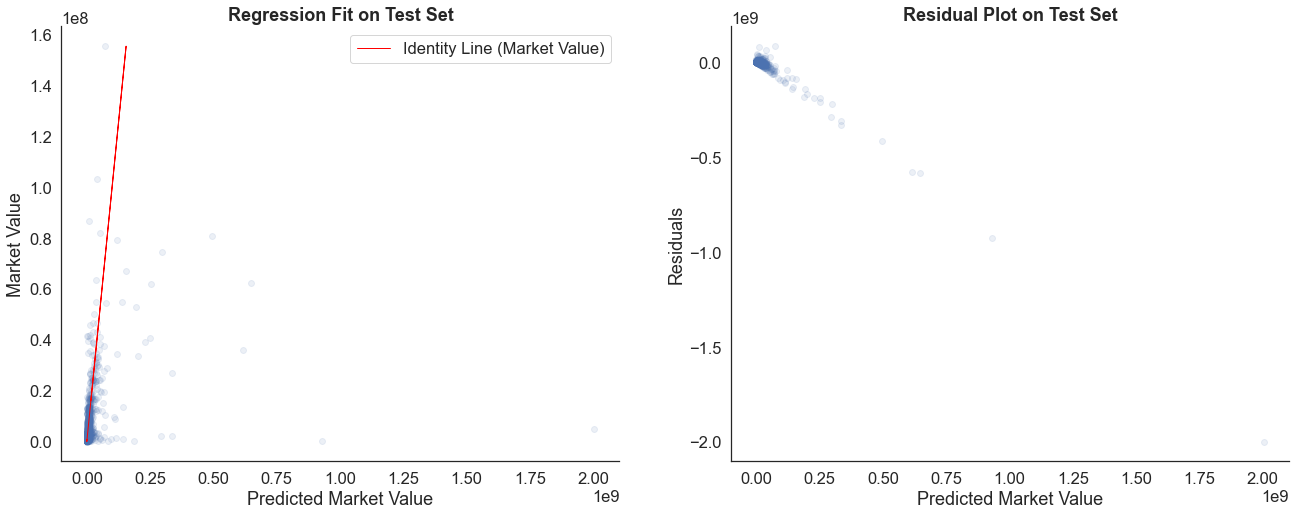

In [107]:
sns.set(style='white',font_scale=1.5)
diagnostic_plot3(X_train_val, y_train_val,X_test,y_test)
plt.savefig('regression2.png',transparent=True, bbox_inches='tight')

In [108]:
Test_Set.dtypes

short_name                      object
Market Value                   float64
Predicted Market Value         float64
age                              int64
international_reputation         int64
attacking_crossing             float64
attacking_finishing            float64
attacking_volleys              float64
skill_fk_accuracy              float64
skill_ball_control             float64
movement_acceleration          float64
movement_agility               float64
movement_reactions             float64
movement_balance               float64
power_shot_power               float64
power_stamina                  float64
power_strength                 float64
power_long_shots               float64
mentality_aggression           float64
mentality_positioning          float64
mentality_penalties            float64
mentality_composure            float64
defending_marking_awareness    float64
defending_sliding_tackle       float64
goalkeeping_kicking            float64
goalkeeping_positioning  

In [109]:
Test_Set['Predicted Market Value'] 

0       3.166617e+08
1       1.611545e+08
2       1.328067e+08
3       1.192781e+08
4       8.990725e+07
            ...     
4805    3.380983e+04
4806    3.325141e+04
4807    2.751444e+04
4808    2.528957e+04
4809    2.333004e+04
Name: Predicted Market Value, Length: 4810, dtype: float64

In [110]:
Test_Set['Market Value'] = Test_Set['Market Value'].apply(lambda x : "{:,}".format(int(x)))
Test_Set['Predicted Market Value'] = Test_Set['Predicted Market Value'].apply(lambda x : "{:,}".format(int(x)))

C:\Users\Kiko\AppData\Local\Temp/ipykernel_12192/3522353445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_Set['Market Value'] = Test_Set['Market Value'].apply(lambda x : "{:,}".format(int(x)))
C:\Users\Kiko\AppData\Local\Temp/ipykernel_12192/3522353445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_Set['Predicted Market Value'] = Test_Set['Predicted Market Value'].apply(lambda x : "{:,}".format(int(x)))


In [111]:
Test_Set

,short_name,Market Value,Predicted Market Value,age,international_reputation,attacking_crossing,attacking_finishing,attacking_volleys,skill_fk_accuracy,skill_ball_control,...,power_long_shots,mentality_aggression,mentality_positioning,mentality_penalties,mentality_composure,defending_marking_awareness,defending_sliding_tackle,goalkeeping_kicking,goalkeeping_positioning,preferred_foot_Right
0,K. Mbappé,"155,200,001","316,661,690",22,4,78.0,93.0,83.0,69.0,91.0,...,82.0,62.0,92.0,79.0,88.0,26.0,32.0,7.0,11.0,1
1,Neymar Jr,"103,200,000","161,154,536",29,5,85.0,83.0,86.0,87.0,95.0,...,81.0,63.0,86.0,93.0,93.0,35.0,29.0,15.0,15.0,1
2,L. Messi,"62,400,000","132,806,745",34,5,85.0,95.0,88.0,94.0,96.0,...,94.0,44.0,93.0,75.0,96.0,20.0,24.0,15.0,14.0,0
3,J. Kimmich,"86,400,001","119,278,095",26,4,91.0,68.0,69.0,61.0,85.0,...,84.0,89.0,80.0,44.0,85.0,85.0,79.0,7.0,15.0,1
4,M. Salah,"80,800,000","89,907,253",29,4,79.0,91.0,81.0,69.0,89.0,...,84.0,63.0,91.0,86.0,90.0,38.0,41.0,9.0,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4805,Guo Yunqi,"56,001","33,809",24,1,39.0,32.0,24.0,34.0,45.0,...,34.0,51.0,45.0,41.0,40.0,43.0,44.0,8.0,11.0,1
4806,Ruan Zhexiang,"56,001","33,251",24,1,38.0,29.0,33.0,31.0,44.0,...,28.0,52.0,33.0,43.0,41.0,38.0,44.0,13.0,11.0,1
4807,G. Doherty,"16,001","27,514",39,1,17.0,11.0,11.0,11.0,19.0,...,13.0,32.0,12.0,11.0,29.0,18.0,9.0,57.0,55.0,1
4808,C. Dundas,"2,280,362","25,289",40,1,34.0,58.0,44.0,35.0,54.0,...,52.0,42.0,57.0,56.0,53.0,20.0,16.0,10.0,12.0,1


In [112]:
#Test_Set['Market Value'] = Test_Set['Market Value'].apply(lambda x : "{:,}".format(int(x)))
#Test_Set['Predicted Market Value'] = Test_Set['Predicted Market Value'].apply(lambda x : "{:,}".format(int(x)))
#Test_Set[['defending','passing','physic','shooting','goalkeeping']] = Test_Set[['defending','passing','physic','shooting','goalkeeping']].apply(lambda x: round(x,1)) #'international_reputation'
Test_Set = Test_Set.rename(columns={'Market Value':'Market Value (Euros)','Predicted Market Value': 'Predicted Market Value (Euros)'})
Test_Set

,short_name,Market Value (Euros),Predicted Market Value (Euros),age,international_reputation,attacking_crossing,attacking_finishing,attacking_volleys,skill_fk_accuracy,skill_ball_control,...,power_long_shots,mentality_aggression,mentality_positioning,mentality_penalties,mentality_composure,defending_marking_awareness,defending_sliding_tackle,goalkeeping_kicking,goalkeeping_positioning,preferred_foot_Right
0,K. Mbappé,"155,200,001","316,661,690",22,4,78.0,93.0,83.0,69.0,91.0,...,82.0,62.0,92.0,79.0,88.0,26.0,32.0,7.0,11.0,1
1,Neymar Jr,"103,200,000","161,154,536",29,5,85.0,83.0,86.0,87.0,95.0,...,81.0,63.0,86.0,93.0,93.0,35.0,29.0,15.0,15.0,1
2,L. Messi,"62,400,000","132,806,745",34,5,85.0,95.0,88.0,94.0,96.0,...,94.0,44.0,93.0,75.0,96.0,20.0,24.0,15.0,14.0,0
3,J. Kimmich,"86,400,001","119,278,095",26,4,91.0,68.0,69.0,61.0,85.0,...,84.0,89.0,80.0,44.0,85.0,85.0,79.0,7.0,15.0,1
4,M. Salah,"80,800,000","89,907,253",29,4,79.0,91.0,81.0,69.0,89.0,...,84.0,63.0,91.0,86.0,90.0,38.0,41.0,9.0,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4805,Guo Yunqi,"56,001","33,809",24,1,39.0,32.0,24.0,34.0,45.0,...,34.0,51.0,45.0,41.0,40.0,43.0,44.0,8.0,11.0,1
4806,Ruan Zhexiang,"56,001","33,251",24,1,38.0,29.0,33.0,31.0,44.0,...,28.0,52.0,33.0,43.0,41.0,38.0,44.0,13.0,11.0,1
4807,G. Doherty,"16,001","27,514",39,1,17.0,11.0,11.0,11.0,19.0,...,13.0,32.0,12.0,11.0,29.0,18.0,9.0,57.0,55.0,1
4808,C. Dundas,"2,280,362","25,289",40,1,34.0,58.0,44.0,35.0,54.0,...,52.0,42.0,57.0,56.0,53.0,20.0,16.0,10.0,12.0,1


In [113]:
Test_Set.to_csv('prueba final_lr.csv')

In [114]:
def diagnostic_plot4(x_train, y_train, x_test, y_test):
    plt.figure(figsize=(22,8))
    
    poly = make_pipeline(PolynomialFeatures(4), LinearRegression())
    poly.fit(x_train,y_train)
    pred = poly.predict(x_test)
    
  #  rgr = LinearRegression()
  #  rgr.fit(x_train,y_train)
  #  pred = rgr.predict(x_test)    

    plt.subplot(1, 2, 1)
    plt.scatter(pred,y_test,alpha=0.1)
    plt.plot(y_test, y_test, color='red',linewidth=1,label='Identity Line (Log Market Value)')
    plt.title("Regression Fit on Test Set",weight='bold')
    plt.xlabel("Log Predicted Market Value")
    plt.ylabel("Log Market Value")
    plt.legend(loc='lower right')
    sns.despine()
    
    plt.subplot(1, 2, 2)
    res = np.array(y_test).reshape(-1,1) - pred
    plt.scatter(pred, res,alpha=0.1)
    plt.title("Residual Plot on Test Set",weight='bold')
    plt.xlabel("Log Predicted Market Value")
    plt.ylabel("Residuals")
    sns.despine()
    
 #   plt.subplot(1, 3, 3)
 #   #Generates a probability plot of sample data against the quantiles of a 
 #   # specified theoretical distribution 
 #   stats.probplot(res.T[0], dist="norm", plot=plt,)
 #   plt.title("Normal Q-Q plot")

In [115]:
poly = make_pipeline(PolynomialFeatures(4), LinearRegression())
poly.fit(X_train_val,y_train_val)
predicted = poly.predict(X_test)
predicted

array([[13.66149472],
       [12.35810834],
       [13.42018179],
       ...,
       [12.30523666],
       [11.82917953],
       [16.13225876]])

In [116]:
Test_Set_2 = pd.DataFrame(y_test).join(X_test).join(pd.DataFrame(players_22_norm['short_name']))
Test_Set_2['Log Market Value'] = np.exp(Test_Set_2['Log Market Value'] )
Test_Set_2 = Test_Set_2.rename(columns={'Log Market Value':'Market Value'})
Test_Set_2['Predicted Market Value'] = np.exp(predicted)
Test_Set_2 = Test_Set_2.sort_values(by='Predicted Market Value',ascending=False)
#Test_Set['Market Value'] = Test_Set['Market Value'].apply(lambda x : "{:,}".format(int(x)))
#Test_Set['Predicted Market Value'] = Test_Set['Predicted Market Value'].apply(lambda x : "{:,}".format(int(x)))

In [122]:
Test_Set_2 = Test_Set_2[['short_name','Market Value','Predicted Market Value','age','international_reputation','attacking_crossing', 'attacking_finishing',
       'attacking_volleys', 'skill_fk_accuracy', 'skill_ball_control',
       'movement_acceleration', 'movement_agility', 'movement_reactions',
       'movement_balance', 'power_shot_power', 'power_stamina',
       'power_strength', 'power_long_shots', 'mentality_aggression',
       'mentality_positioning', 'mentality_penalties', 'mentality_composure',
       'defending_marking_awareness', 'defending_sliding_tackle',
       'goalkeeping_kicking', 'goalkeeping_positioning', 'preferred_foot_Right']]
Test_Set_2.reset_index(inplace=True)
Test_Set_2.drop('index',axis=1,inplace=True)
Test_Set_2

C:\Users\Kiko\AppData\Local\Temp/ipykernel_12192/3650533176.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_Set_2.drop('index',axis=1,inplace=True)


,short_name,Market Value,Predicted Market Value,age,international_reputation,attacking_crossing,attacking_finishing,attacking_volleys,skill_fk_accuracy,skill_ball_control,...,power_long_shots,mentality_aggression,mentality_positioning,mentality_penalties,mentality_composure,defending_marking_awareness,defending_sliding_tackle,goalkeeping_kicking,goalkeeping_positioning,preferred_foot_Right
0,Juli Freitinho,4800001.0,2.004169e+09,21,1,54.0,44.0,35.0,50.0,63.0,...,45.0,82.0,67.0,63.0,71.0,82.0,75.0,14.0,13.0,1
1,M. Simon,136001.0,9.289909e+08,35,1,48.0,64.0,36.0,29.0,61.0,...,58.0,93.0,63.0,66.0,64.0,29.0,39.0,11.0,16.0,1
2,L. Messi,62400001.0,6.471879e+08,34,5,85.0,95.0,88.0,94.0,96.0,...,94.0,44.0,93.0,75.0,96.0,20.0,24.0,15.0,14.0,0
3,S. de Vrij,36000001.0,6.154914e+08,29,3,49.0,25.0,27.0,16.0,75.0,...,60.0,77.0,31.0,41.0,85.0,89.0,85.0,7.0,14.0,1
4,M. Salah,80800001.0,4.948285e+08,29,4,79.0,91.0,81.0,69.0,89.0,...,84.0,63.0,91.0,86.0,90.0,38.0,41.0,9.0,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4805,Ivo Gonçalves,104001.0,2.044585e+02,37,1,25.0,12.0,15.0,9.0,24.0,...,11.0,38.0,18.0,17.0,57.0,9.0,13.0,64.0,70.0,1
4806,C. Verfurth,480001.0,5.464104e+01,25,1,22.0,38.0,22.0,18.0,65.0,...,59.0,43.0,53.0,71.0,59.0,60.0,58.0,6.0,13.0,1
4807,C. Lucchetti,200001.0,7.385631e+00,43,1,23.0,13.0,18.0,30.0,35.0,...,16.0,45.0,16.0,54.0,41.0,21.0,13.0,77.0,69.0,1
4808,I. Khune,260001.0,5.454550e+00,34,2,20.0,16.0,13.0,38.0,32.0,...,20.0,32.0,14.0,49.0,41.0,17.0,15.0,90.0,64.0,1


In [123]:
mean_absolute_error(Test_Set_2['Market Value'],Test_Set_2['Predicted Market Value'])

2866340.1128624855

In [124]:
r2_score(Test_Set_2['Market Value'],Test_Set_2['Predicted Market Value'])

-32.73863349715972

In [125]:
stats.kurtosis(Test_Set_2['Market Value']-Test_Set_2['Predicted Market Value'])

1958.4360295615522

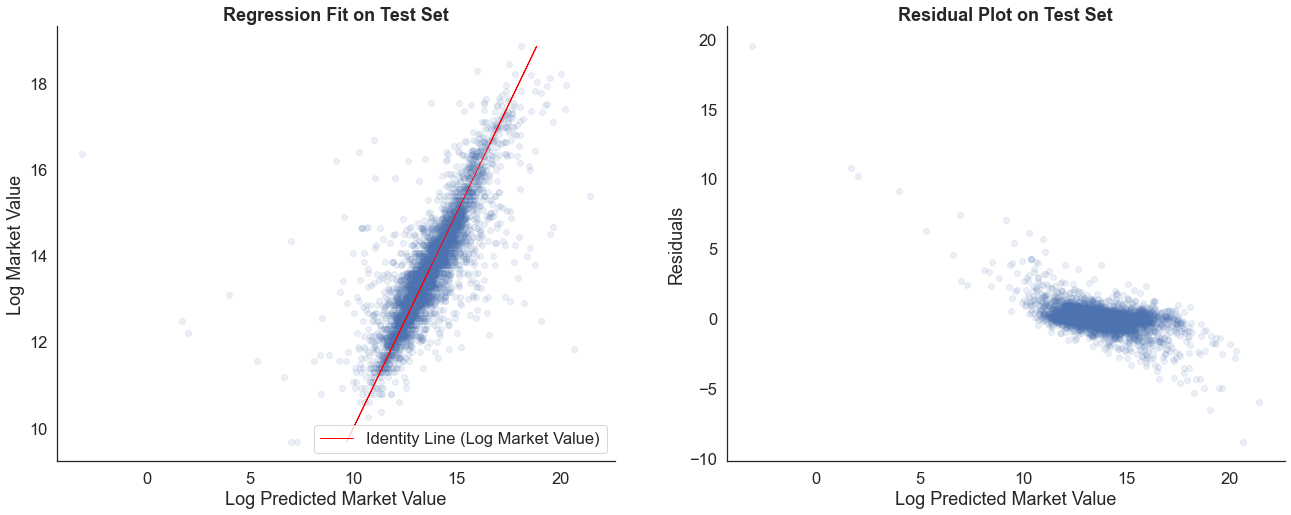

In [126]:
sns.set(style='white',font_scale=1.5)
diagnostic_plot4(X_train_val, y_train_val,X_test,y_test)
plt.savefig('regression2.png',transparent=True, bbox_inches='tight')

In [127]:
Test_Set_2['Market Value'] = Test_Set_2['Market Value'].apply(lambda x : "{:,}".format(int(x)))
Test_Set_2['Predicted Market Value'] = Test_Set_2['Predicted Market Value'].apply(lambda x : "{:,}".format(int(x)))

C:\Users\Kiko\AppData\Local\Temp/ipykernel_12192/2950278558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_Set_2['Market Value'] = Test_Set_2['Market Value'].apply(lambda x : "{:,}".format(int(x)))
C:\Users\Kiko\AppData\Local\Temp/ipykernel_12192/2950278558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_Set_2['Predicted Market Value'] = Test_Set_2['Predicted Market Value'].apply(lambda x : "{:,}".format(int(x)))


In [129]:
#Test_Set['Market Value'] = Test_Set['Market Value'].apply(lambda x : "{:,}".format(int(x)))
#Test_Set['Predicted Market Value'] = Test_Set['Predicted Market Value'].apply(lambda x : "{:,}".format(int(x)))
#Test_Set_2[['defending','passing','physic','shooting','goalkeeping']] = Test_Set_2[['defending','passing','physic','shooting','goalkeeping']].apply(lambda x: round(x,1)) #'international_reputation'
Test_Set_2 = Test_Set_2.rename(columns={'Market Value':'Market Value (Euros)','Predicted Market Value': 'Predicted Market Value (Euros)'})
Test_Set_2

,short_name,Market Value (Euros),Predicted Market Value (Euros),age,international_reputation,attacking_crossing,attacking_finishing,attacking_volleys,skill_fk_accuracy,skill_ball_control,...,power_long_shots,mentality_aggression,mentality_positioning,mentality_penalties,mentality_composure,defending_marking_awareness,defending_sliding_tackle,goalkeeping_kicking,goalkeeping_positioning,preferred_foot_Right
0,Juli Freitinho,"4,800,000","2,004,168,998",21,1,54.0,44.0,35.0,50.0,63.0,...,45.0,82.0,67.0,63.0,71.0,82.0,75.0,14.0,13.0,1
1,M. Simon,"136,000","928,990,862",35,1,48.0,64.0,36.0,29.0,61.0,...,58.0,93.0,63.0,66.0,64.0,29.0,39.0,11.0,16.0,1
2,L. Messi,"62,400,000","647,187,876",34,5,85.0,95.0,88.0,94.0,96.0,...,94.0,44.0,93.0,75.0,96.0,20.0,24.0,15.0,14.0,0
3,S. de Vrij,"36,000,001","615,491,373",29,3,49.0,25.0,27.0,16.0,75.0,...,60.0,77.0,31.0,41.0,85.0,89.0,85.0,7.0,14.0,1
4,M. Salah,"80,800,000","494,828,509",29,4,79.0,91.0,81.0,69.0,89.0,...,84.0,63.0,91.0,86.0,90.0,38.0,41.0,9.0,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4805,Ivo Gonçalves,"104,001",204,37,1,25.0,12.0,15.0,9.0,24.0,...,11.0,38.0,18.0,17.0,57.0,9.0,13.0,64.0,70.0,1
4806,C. Verfurth,"480,001",54,25,1,22.0,38.0,22.0,18.0,65.0,...,59.0,43.0,53.0,71.0,59.0,60.0,58.0,6.0,13.0,1
4807,C. Lucchetti,"200,000",7,43,1,23.0,13.0,18.0,30.0,35.0,...,16.0,45.0,16.0,54.0,41.0,21.0,13.0,77.0,69.0,1
4808,I. Khune,"260,000",5,34,2,20.0,16.0,13.0,38.0,32.0,...,20.0,32.0,14.0,49.0,41.0,17.0,15.0,90.0,64.0,1


# Modelo entero

In [130]:
rgr = LinearRegression()
rgr.fit(X_model,y)
predicted = rgr.predict(X_model)    
predicted

array([18.62507581, 18.6728061 , 18.00500475, ..., 10.56787417,
       10.80638471, 10.80638471])

In [131]:
Test_Set = pd.DataFrame(y).join(X_model).join(pd.DataFrame(players_22_norm['short_name']))
Test_Set['Log Market Value'] = np.exp(Test_Set['Log Market Value'] )
Test_Set = Test_Set.rename(columns={'Log Market Value':'Market Value'})
Test_Set['Predicted Market Value'] = np.exp(predicted)
Test_Set = Test_Set.sort_values(by='Predicted Market Value',ascending=False)
#Test_Set['Market Value'] = Test_Set['Market Value'].apply(lambda x : "{:,}".format(int(x)))
#Test_Set['Predicted Market Value'] = Test_Set['Predicted Market Value'].apply(lambda x : "{:,}".format(int(x)))

In [145]:
Test_Set.index

RangeIndex(start=0, stop=19239, step=1)

In [149]:
Test_Set = Test_Set[['short_name', 'overall', 'age', 'international_reputation','Market Value (Euros)', 'Predicted Market Value (Euros)']] #
#Test_Set.reset_index(inplace=True)
#Test_Set.drop('index',axis=1,inplace=True)
Test_Set

,short_name,overall,age,international_reputation,Market Value (Euros),Predicted Market Value (Euros)
0,K. Mbappé,91,22,4,"155,200,001","284,621,707"
1,E. Haaland,88,20,4,"110,000,001","203,839,052"
2,J. Oblak,91,28,5,"89,600,001","171,320,551"
3,G. Donnarumma,89,22,3,"95,600,001","157,857,603"
4,Neymar Jr,91,29,5,"103,200,000","152,060,900"
...,...,...,...,...,...,...
19234,Gao Xiang,49,32,1,"28,001","15,330"
19235,M. McChrystal,52,37,1,"12,000","14,968"
19236,G. Maley,52,38,1,"7,201","13,285"
19237,J. Russell,49,36,1,"12,000","9,514"


In [152]:
#Test_Set['Market Value (Euros)'] = Test_Set['Market Value (Euros)'].apply(lambda x : "{:,}".format(int(x)))
#Test_Set['Predicted Market Value (Euros)'] = Test_Set['Predicted Market Value (Euros)'].apply(lambda x : "{:,}".format(int(x)))

In [153]:
Test_Set.head(20)

,short_name,overall,age,international_reputation,Market Value (Euros),Predicted Market Value (Euros)
0,K. Mbappé,91,22,4,"155,200,001","284,621,707"
1,E. Haaland,88,20,4,"110,000,001","203,839,052"
2,J. Oblak,91,28,5,"89,600,001","171,320,551"
3,G. Donnarumma,89,22,3,"95,600,001","157,857,603"
4,Neymar Jr,91,29,5,"103,200,000","152,060,900"
5,H. Kane,90,27,4,"103,600,000","129,554,848"
6,R. Lewandowski,92,32,5,"95,600,001","128,675,732"
7,L. Messi,93,34,5,"62,400,000","122,678,272"
8,J. Sancho,87,21,3,"93,200,001","121,436,092"
9,J. Kimmich,89,26,4,"86,400,001","120,612,067"


In [135]:
#Test_Set = Test_Set.rename(columns={'Market Value':'Market Value (Euros)','Predicted Market Value': 'Predicted Market Value (Euros)'})
#Test_Set

,Market Value (Euros),overall,age,international_reputation,short_name,Predicted Market Value (Euros)
sofifa_id,,,,,,
231747,"155,200,001",91,22,4,K. Mbappé,"284,621,707"
239085,"110,000,001",88,20,4,E. Haaland,"203,839,052"
200389,"89,600,001",91,28,5,J. Oblak,"171,320,551"
230621,"95,600,001",89,22,3,G. Donnarumma,"157,857,603"
190871,"103,200,000",91,29,5,Neymar Jr,"152,060,900"
...,...,...,...,...,...,...
255618,"28,001",49,32,1,Gao Xiang,"15,330"
149697,"12,000",52,37,1,M. McChrystal,"14,968"
245558,"7,201",52,38,1,G. Maley,"13,285"


In [154]:
Test_Set.to_csv('prueba final_lr_entero.csv')